Results Section

- Dipole Auger + 2MRS Dipoles in >cz (with flux weight)
- Angular distance to Auger Dipole
- [Use full Sample]
---------------------

- Dipole Auger + 2MRS Dipoles in slices of cz (with flux weight)
- Angular distance to Auger Dipole
- [Use full Sample]
---------------------
- Galaxy-Flux correlation for different cz
- [Use sample with completeness]
---------------------

- G-F correlation at closest cz for different K
- [Use sample with completeness]



### Read Full Catalogue

In [5]:
"""
Read full 2MRS catalogue
"""

import numpy as np
from astropy.io import ascii
from astropy.table import Table

def read_catalog(path='../data/', 
                 name='2mrs_1175_done.dat', ncols=29):
  
  with open(path+name, 'r') as file:
    archivo = file.readlines()
    header  = [a.replace('#','').split() for a in archivo[:10]]
    lines   = archivo[10:]
  
  columns = header[-1]
  assert(len(columns) == ncols)
  print("Read %s\nColumns:" % name)
  print(columns)
  
  g = [[] for _ in range(ncols)]     
  for line in lines:
    values = line.split()
    g[0].append(            values[0]);   g[1].append(np.float32(values[1]));   g[2].append(np.float32(values[2]));
    g[3].append(np.float32( values[3]));  g[4].append(np.float32(values[4]));   g[5].append(np.float32(values[5]));
    g[6].append(np.float32( values[6]));  g[7].append(np.float32(values[7]));   g[8].append(np.float32(values[8]));
    g[9].append(np.float32( values[9]));  g[10].append(np.float32(values[10])); g[11].append(np.float32(values[11]));
    g[12].append(np.float32(values[12])); g[13].append(np.float32(values[13])); g[14].append(np.float32(values[14]));
    g[15].append(np.float32(values[15])); g[16].append(np.float32(values[16])); g[17].append(np.float32(values[17]));
    g[18].append(np.float32(values[18])); g[19].append(np.float32(values[19])); g[20].append(np.float32(values[20]));
    g[21].append(           values[21]) ; g[22].append(           values[22]);  g[23].append(values[23]); g[24].append(np.int32(values[24]));
    g[25].append(np.int32(  values[25])); g[26].append(           values[26]);  g[27].append(values[27]); g[28].append(         values[28])
  
  data = Table()
  for idx, col in enumerate(columns):
    data[col] = np.array(g[idx])

  return data

data = read_catalog()
print(data[:5])
print("Total number of galaxies:", len(data))
print("Columns in the data:", data.colnames)


Read 2mrs_1175_done.dat
Columns:
['ID', 'RAdeg', 'DECdeg', 'l', 'b', 'k_c', 'h_c', 'j_c', 'k_tc', 'h_tc', 'j_tc', 'e_k', 'e_h', 'e_j', 'e_kt', 'e_ht', 'e_jt', 'e_bv', 'r_iso', 'r_ext', 'b/a', 'flgs', 'type', 'ts', 'v', 'e_v', 'c', 'vsrc', 'CAT_ID']
       ID          RAdeg     DECdeg  ...  c          vsrc           CAT_ID  
---------------- --------- --------- ... --- ------------------- -----------
00424433+4116074  10.68471  41.26875 ...   N 1991RC3.9.C...0000d MESSIER_031
00473313-2517196  11.88806  -25.2888 ...   N 2004AJ....128...16K    NGC_0253
09553318+6903549 148.88826  69.06526 ...   N 1991RC3.9.C...0000d MESSIER_081
13252775-4301073 201.36565 -43.01871 ...   N 1978PASP...90..237G    NGC_5128
13052727-4928044 196.36366  -49.4679 ...   N 2004AJ....128...16K    NGC_4945
Total number of galaxies: 43533
Columns in the data: ['ID', 'RAdeg', 'DECdeg', 'l', 'b', 'k_c', 'h_c', 'j_c', 'k_tc', 'h_tc', 'j_tc', 'e_k', 'e_h', 'e_j', 'e_kt', 'e_ht', 'e_jt', 'e_bv', 'r_iso', 'r_ext', 'b/a', 

### Plot K vs cz

Read 2mrs_1175_done.dat
Columns:
['ID', 'RAdeg', 'DECdeg', 'l', 'b', 'k_c', 'h_c', 'j_c', 'k_tc', 'h_tc', 'j_tc', 'e_k', 'e_h', 'e_j', 'e_kt', 'e_ht', 'e_jt', 'e_bv', 'r_iso', 'r_ext', 'b/a', 'flgs', 'type', 'ts', 'v', 'e_v', 'c', 'vsrc', 'CAT_ID']


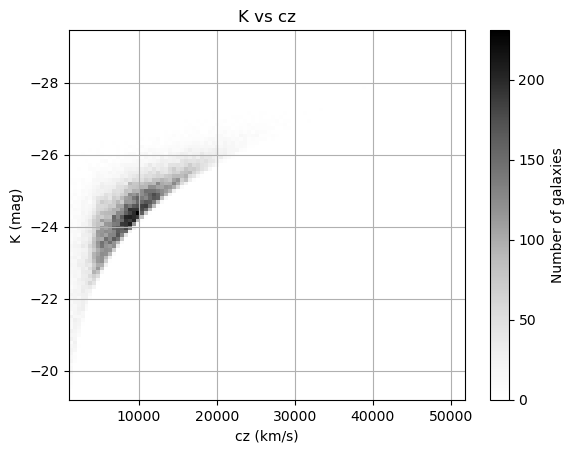

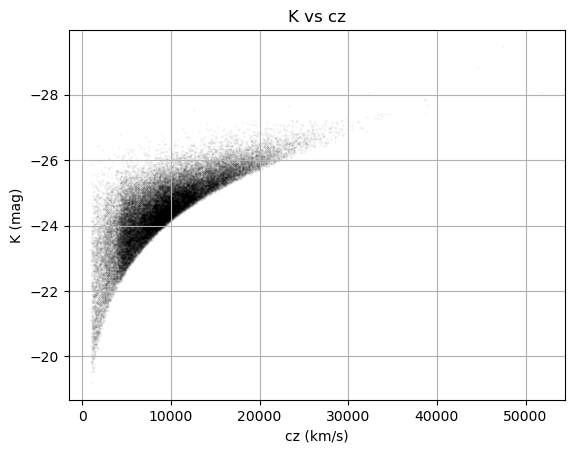

In [31]:
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
import numpy as np
from astropy.io import ascii
from astropy.table import Table

def read_catalog(path='../data/', 
                 name='2mrs_1175_done.dat', ncols=29):
  
  with open(path+name, 'r') as file:
    archivo = file.readlines()
    header  = [a.replace('#','').split() for a in archivo[:10]]
    lines   = archivo[10:]
  
  columns = header[-1]
  assert(len(columns) == ncols)
  print("Read %s\nColumns:" % name)
  print(columns)
  
  g = [[] for _ in range(ncols)]     
  for line in lines:
    values = line.split()
    g[0].append(            values[0]);   g[1].append(np.float32(values[1]));   g[2].append(np.float32(values[2]));
    g[3].append(np.float32( values[3]));  g[4].append(np.float32(values[4]));   g[5].append(np.float32(values[5]));
    g[6].append(np.float32( values[6]));  g[7].append(np.float32(values[7]));   g[8].append(np.float32(values[8]));
    g[9].append(np.float32( values[9]));  g[10].append(np.float32(values[10])); g[11].append(np.float32(values[11]));
    g[12].append(np.float32(values[12])); g[13].append(np.float32(values[13])); g[14].append(np.float32(values[14]));
    g[15].append(np.float32(values[15])); g[16].append(np.float32(values[16])); g[17].append(np.float32(values[17]));
    g[18].append(np.float32(values[18])); g[19].append(np.float32(values[19])); g[20].append(np.float32(values[20]));
    g[21].append(           values[21]) ; g[22].append(           values[22]);  g[23].append(values[23]); g[24].append(np.int32(values[24]));
    g[25].append(np.int32(  values[25])); g[26].append(           values[26]);  g[27].append(values[27]); g[28].append(         values[28])
  
  data = Table()
  for idx, col in enumerate(columns):
    data[col] = np.array(g[idx])

  return data

data = read_catalog()
data = data[data['v'] > 1000]  # Filter out galaxies with negative cz values

# Define a cosmology (e.g., a Flat Lambda-CDM model with specific parameters)
cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Om0=0.3)

# Calculate comoving distance to a given redshift

cz = data['v']  # Use only positive cz values

comoving_dist = cosmo.comoving_distance(cz/3e5) 
M_Ks  = data['k_tc'] - 25 - 5*np.log10(comoving_dist.value*(1 + cz/3e5))  # K-band absolute magnitude

H = plt.hist2d(cz, M_Ks, bins=100, cmap='Greys', cmin=0)
plt.colorbar(H[3], label='Number of galaxies')
plt.gca().invert_yaxis()
plt.xlabel('cz (km/s)')
plt.ylabel('K (mag)')
plt.title('K vs cz')
plt.grid()
plt.show()

plt.scatter(cz, M_Ks, s=.1, alpha=0.1, color='black')
plt.gca().invert_yaxis()
plt.xlabel('cz (km/s)')
plt.ylabel('K (mag)')
plt.title('K vs cz')
plt.grid()
plt.show()

Read 2mrs_1175_done.dat
Columns:
['ID', 'RAdeg', 'DECdeg', 'l', 'b', 'k_c', 'h_c', 'j_c', 'k_tc', 'h_tc', 'j_tc', 'e_k', 'e_h', 'e_j', 'e_kt', 'e_ht', 'e_jt', 'e_bv', 'r_iso', 'r_ext', 'b/a', 'flgs', 'type', 'ts', 'v', 'e_v', 'c', 'vsrc', 'CAT_ID']

=== Dipole for Full Sample ===
N = 23498 galaxies
RA = 150.71° ± 3.42°
Dec = 13.72° ± 3.42°
Amplitude = 0.0645
Significance = inf sigma (p = 1.44e-61)
Angular separation from Auger = 62.26°

=== Dipole for 1200-2200 km/s ===
N = 1290 galaxies
RA = 153.69° ± 3.14°
Dec = -6.36° ± 3.14°
Amplitude = 0.2812
Significance = inf sigma (p = 3.25e-73)
Angular separation from Auger = 54.35°

=== Dipole for 2200-3200 km/s ===
N = 1628 galaxies
RA = 178.63° ± 2.82°
Dec = -28.62° ± 2.82°
Amplitude = 0.3239
Significance = inf sigma (p = 1.62e-90)
Angular separation from Auger = 69.34°

=== Dipole for 3200-4200 km/s ===
N = 2011 galaxies
RA = 156.99° ± 4.27°
Dec = -25.71° ± 4.27°
Amplitude = 0.1969
Significance = inf sigma (p = 8.52e-40)
Angular separation

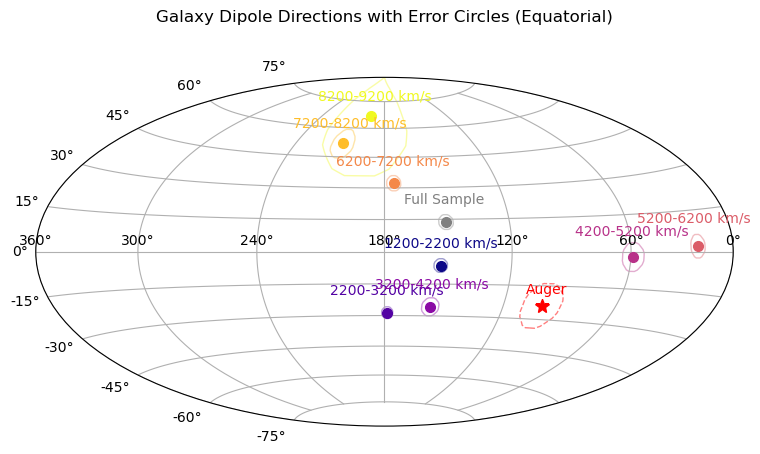

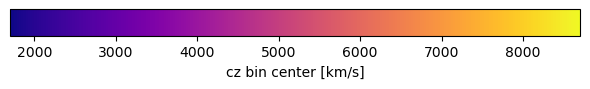

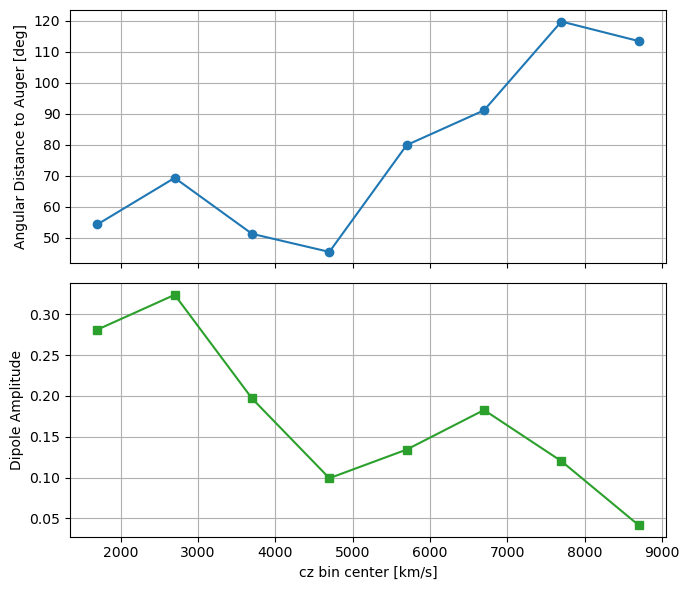

In [4]:
import numpy as np
from astropy.io import ascii
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u
from scipy.special import erfinv
import matplotlib.cm as cm
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from astropy.cosmology import FlatLambdaCDM
from astropy.table import Table

def read_catalog(path='../data/', 
                 name='2mrs_1175_done.dat', ncols=29):
  
  with open(path+name, 'r') as file:
    archivo = file.readlines()
    header  = [a.replace('#','').split() for a in archivo[:10]]
    lines   = archivo[10:]
  
  columns = header[-1]
  assert(len(columns) == ncols)
  print("Read %s\nColumns:" % name)
  print(columns)
  
  g = [[] for _ in range(ncols)]     
  for line in lines:
    values = line.split()
    g[0].append(            values[0]);   g[1].append(np.float32(values[1]));   g[2].append(np.float32(values[2]));
    g[3].append(np.float32( values[3]));  g[4].append(np.float32(values[4]));   g[5].append(np.float32(values[5]));
    g[6].append(np.float32( values[6]));  g[7].append(np.float32(values[7]));   g[8].append(np.float32(values[8]));
    g[9].append(np.float32( values[9]));  g[10].append(np.float32(values[10])); g[11].append(np.float32(values[11]));
    g[12].append(np.float32(values[12])); g[13].append(np.float32(values[13])); g[14].append(np.float32(values[14]));
    g[15].append(np.float32(values[15])); g[16].append(np.float32(values[16])); g[17].append(np.float32(values[17]));
    g[18].append(np.float32(values[18])); g[19].append(np.float32(values[19])); g[20].append(np.float32(values[20]));
    g[21].append(           values[21]) ; g[22].append(           values[22]);  g[23].append(values[23]); g[24].append(np.int32(values[24]));
    g[25].append(np.int32(  values[25])); g[26].append(           values[26]);  g[27].append(values[27]); g[28].append(         values[28])
  
  data = Table()
  for idx, col in enumerate(columns):
    data[col] = np.array(g[idx])

  data = data[data['v'] > 1200]  # Filter out galaxies with negative cz values

  # Create ks column for K-band absolute magnitude
  from astropy.constants import c
  cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Om0=0.3)
  comoving_dist = cosmo.comoving_distance((data['v']*u.km/u.s)/c) 
  data['ks']  = data['k_tc'] - 25 - 5*np.log10(comoving_dist.value*(1 + (data['v']*u.km/u.s)/c))  # K-band absolute magnitude

  data['_RAJ2000'] = data['RAdeg']  
  data['_DEJ2000'] = data['DECdeg']  
  data['cz'] = data['v']

  return data

# === Load galaxy catalogue ===
gxs = read_catalog()
RA_all = np.deg2rad(gxs['_RAJ2000'])
Dec_all = np.deg2rad(gxs['_DEJ2000'])
cz_all = gxs['cz']
weights_all = np.ones(len(RA_all))

# === Define cz bins ===
cz_bins = [
    (1200, 9000),       # Full sample
    (1200, 3600),
    (4000, 5000),
    (9000, 9400)
]
cz_bins = [(cz, cz + 1000) for cz in range(1200, 9000, 1000)]
cz_bins.insert(0, (1200, 9000))  # Add full sample as first bin

# === Setup colors and storage ===
n_bins = len(cz_bins)
#colors = cm.get_cmap('tab10', n_bins)
dipole_results = {}
# Normalize cz range for colormap
cz_vals = [0.5 * (cz_min + cz_max) for (cz_min, cz_max) in cz_bins]
cz_norm = mcolors.Normalize(vmin=min(cz_vals[1:]), vmax=max(cz_vals[1:]))  # exclude full sample from colormap range
cmap = cm.plasma  # or try 'viridis', 'turbo', 'cividis'

# === Auger reference dipole ===
auger_RA = 100.0
auger_Dec = -24.0
auger_coord = SkyCoord(ra=auger_RA * u.deg, dec=auger_Dec * u.deg, frame='icrs')
auger_error_deg = 10.0  # Typical uncertainty in Auger dipole direction

# === Loop through bins ===
for i, (cz_min, cz_max) in enumerate(cz_bins):
    label = "Full Sample" if i == 0 else f"{cz_min}-{cz_max} km/s"
    cz_mid = 0.5 * (cz_min + cz_max)
    color = 'gray' if i == 0 else cmap(cz_norm(cz_mid))  # gray for full sample, colormap for bins

    # Filter galaxies
    mask = (cz_all > cz_min) & (cz_all < cz_max)
    RA = RA_all[mask]
    Dec = Dec_all[mask]
    weights = weights_all[mask]

    if len(RA) < 10:
        print(f"Skipping {label} — too few galaxies ({len(RA)})")
        continue

    W = np.sum(weights)

    # === 2D Rayleigh dipole ===
    a_alpha = (2.0 / W) * np.sum(weights * np.cos(RA))
    b_alpha = (2.0 / W) * np.sum(weights * np.sin(RA))
    r_alpha = np.sqrt(a_alpha**2 + b_alpha**2)
    phi_alpha_deg = np.rad2deg(np.arctan2(b_alpha, a_alpha) % (2 * np.pi))

    # === 3D dipole direction ===
    x = np.cos(Dec) * np.cos(RA)
    y = np.cos(Dec) * np.sin(RA)
    z = np.sin(Dec)
    X = np.sum(weights * x)
    Y = np.sum(weights * y)
    Z = np.sum(weights * z)
    norm = np.sqrt(X**2 + Y**2 + Z**2)
    X /= norm
    Y /= norm
    Z /= norm

    dipole_amp = norm / W
    alpha_d = (np.arctan2(Y, X) % (2 * np.pi)) * 180 / np.pi
    delta_d = np.arcsin(Z) * 180 / np.pi

    # === Uncertainty and significance ===
    Weff = W**2 / np.sum(weights**2)                # Effective weight
    sigma_r = np.sqrt(2 / Weff)                     # Uncertainty in radial component
    sigma_phi_deg = np.rad2deg(sigma_r / r_alpha)   # Rough approximation
    sigma_dec_deg = sigma_phi_deg                   # rough approximation
    P_rayleigh = np.exp(-Weff * r_alpha**2 / 4)     # Rayleigh p-value
    Zsig = np.sqrt(2) * erfinv(1 - 2 * P_rayleigh)  # Gaussian significance

    # === Angular separation from Auger dipole ===
    dip_coord = SkyCoord(ra=alpha_d * u.deg, dec=delta_d * u.deg, frame='icrs')
    separation = dip_coord.separation(auger_coord).deg

    # === Store results ===
    dipole_results[label] = {
        'RA': alpha_d,
        'Dec': delta_d,
        'r_alpha': r_alpha,
        'd_perp': dipole_amp,
        'sigma_r': sigma_r,
        'sigma_phi': sigma_phi_deg,
        'sigma_dec': sigma_dec_deg,
        'Z': Zsig,
        'P': P_rayleigh,
        'separation': separation,
        'N': len(RA),
        'color': color
    }

    # === Print result ===
    print(f"\n=== Dipole for {label} ===")
    print(f"N = {len(RA)} galaxies")
    print(f"RA = {alpha_d:.2f}° ± {sigma_phi_deg:.2f}°")
    print(f"Dec = {delta_d:.2f}° ± {sigma_dec_deg:.2f}°")
    print(f"Amplitude = {dipole_amp:.4f}")
    print(f"Significance = {Zsig:.2f} sigma (p = {P_rayleigh:.2e})")
    print(f"Angular separation from Auger = {separation:.2f}°")

# === Plot Dipoles ===
plt.figure(figsize=(9, 5))
ax = plt.subplot(111, projection='hammer')
ax.grid(True)

xticks_deg = [360, 300, 240, 180, 120, 60, 0]
xticks_rad = -np.radians(xticks_deg) + np.pi
ax.set_xticks(xticks_rad)
ax.set_xticklabels([f"{d}°" for d in xticks_deg])



for label, res in dipole_results.items():
    ra_rad = np.deg2rad(res['RA'])
    dec_rad = np.deg2rad(res['Dec'])
#    ra_plot = -(ra_rad - np.pi)
    ra_plot = -ra_rad + np.pi  # <- RA increases right to left

    color = res['color']

    amp = res['d_perp']  # Dipole amplitude (scalar)

    # Plot point
    ax.plot(ra_plot, dec_rad, 'o', color=color, label=label, markersize=7)

    # Error circle
    radius = np.deg2rad(res['sigma_phi'])
    circle = plt.Circle((ra_plot, dec_rad), radius,
                        transform=ax.transData, edgecolor=color,
                        facecolor='none', alpha=0.4)
    ax.add_patch(circle)

    ax.text(ra_plot, dec_rad + 0.15, label, ha='center', color=color)


# === Auger Dipole ===
auger_ra_rad = np.deg2rad(auger_RA)
auger_dec_rad = np.deg2rad(auger_Dec)
#auger_ra_plot = -(auger_ra_rad - np.pi)
auger_ra_plot = -np.deg2rad(auger_RA) + np.pi
ax.plot(auger_ra_plot, auger_dec_rad, 'r*', markersize=10, label='Auger Dipole')

# Auger error circle
auger_radius = np.deg2rad(auger_error_deg)
circle = plt.Circle((auger_ra_plot, auger_dec_rad), auger_radius,
                    transform=ax.transData, edgecolor='red',
                    facecolor='none', linestyle='--', alpha=0.5)
ax.add_patch(circle)

ax.text(auger_ra_plot, auger_dec_rad + 0.1, "Auger", ha='center', color='red')

#plt.text(-3.1, -1.8, "Arrow length ∝ Dipole amplitude", fontsize=9)

plt.title("Galaxy Dipole Directions with Error Circles (Equatorial)", pad=40)
#plt.legend(loc='lower left', fontsize='small')
#plt.tight_layout()
#plt.show()

# === Add cz colorbar ===
fig, ax_cb = plt.subplots(figsize=(6, 1))
cb1 = cm.ScalarMappable(norm=cz_norm, cmap=cmap)
cbar = plt.colorbar(cb1, cax=ax_cb, orientation='horizontal')
cbar.set_label("cz bin center [km/s]")
plt.tight_layout()
plt.show()

# === Plot dipole amplitude and angular distance vs cz bin center ===
cz_bin_centers = []
angular_separations = []
dipole_amps = []
ang_diam_dists = []

# Define a cosmology (e.g., a Flat Lambda-CDM model with specific parameters)
cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Om0=0.3)

for label, res in dipole_results.items():
    if label == "Full Sample":
        continue  # skip full sample

    cz_mid = 0.5 * (int(label.split('-')[0]), int(label.split('-')[1].split()[0]))[0] + \
             0.5 * (int(label.split('-')[0]), int(label.split('-')[1].split()[0]))[1]
    cz_bin_centers.append(cz_mid)
    angular_separations.append(res['separation'])
    dipole_amps.append(res['d_perp'])

    # Convert cz_mid to angular diameter distance
    z = cz_mid / 3e5  # use cz/c as redshift
    d_ang = cosmo.angular_diameter_distance(z).value  # in Mpc
    ang_diam_dists.append(d_ang)


# === Plot ===
fig, axs = plt.subplots(2, 1, figsize=(7, 6), sharex=True)

# Top: angular distance
axs[0].plot(cz_bin_centers, angular_separations, 'o-', color='tab:blue')
axs[0].set_ylabel("Angular Distance to Auger [deg]")
axs[0].grid(True)

# Bottom: dipole amplitude
axs[1].plot(cz_bin_centers, dipole_amps, 's-', color='tab:green')
axs[1].set_xlabel("cz bin center [km/s]")
axs[1].set_ylabel("Dipole Amplitude")
axs[1].grid(True)

plt.tight_layout()
plt.show()


Add error bars

Let's try implementing bootstrap errors

Read 2mrs_1175_done.dat
Columns:
['ID', 'RAdeg', 'DECdeg', 'l', 'b', 'k_c', 'h_c', 'j_c', 'k_tc', 'h_tc', 'j_tc', 'e_k', 'e_h', 'e_j', 'e_kt', 'e_ht', 'e_jt', 'e_bv', 'r_iso', 'r_ext', 'b/a', 'flgs', 'type', 'ts', 'v', 'e_v', 'c', 'vsrc', 'CAT_ID']

=== Dipole for Full Sample ===
N = 23498 galaxies
RA = 159.47° ± 8.23° (± 8.44° bootstrapped)
Dec = 33.09° ± 8.23° (± 6.90° bootstrapped)
Amplitude = 0.0394 ± 0.0049
Significance = 6.54 sigma (p = 3.06e-11)
Angular separation from Auger = 80.40° ± 6.60°

=== Dipole for 1200-2200 km/s ===
N = 1290 galaxies
RA = 154.23° ± 6.11° (± 6.64° bootstrapped)
Dec = -24.54° ± 6.11° (± 5.08° bootstrapped)
Amplitude = 0.3000 ± 0.0226
Significance = inf sigma (p = 7.84e-20)
Angular separation from Auger = 49.10° ± 6.45°

=== Dipole for 2200-3200 km/s ===
N = 1628 galaxies
RA = 182.22° ± 4.31° (± 3.17° bootstrapped)
Dec = -36.93° ± 4.31° (± 3.33° bootstrapped)
Amplitude = 0.3565 ± 0.0230
Significance = inf sigma (p = 4.65e-39)
Angular separation from Auger

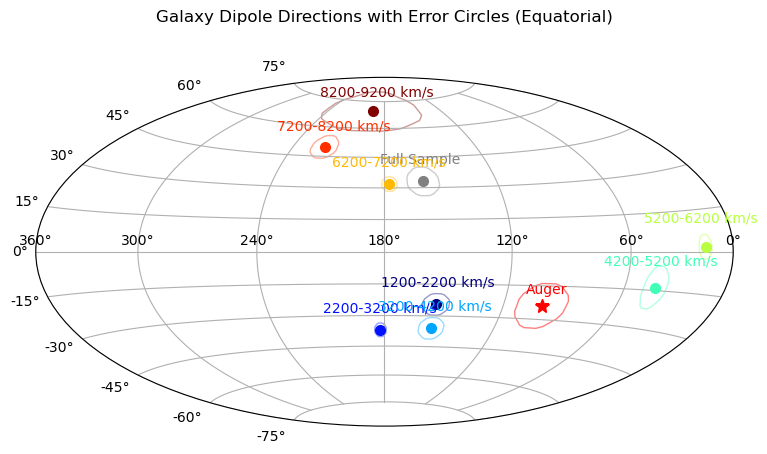

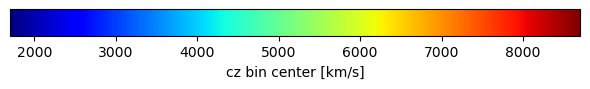

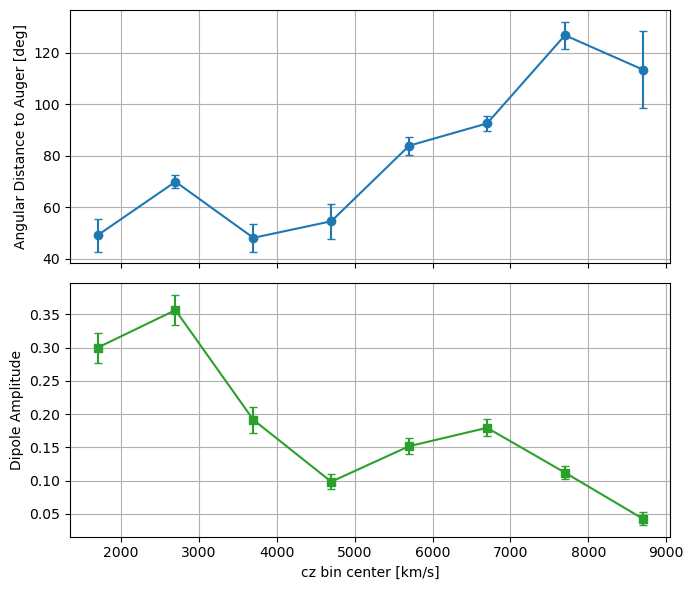

In [10]:
import numpy as np
from astropy.io import ascii
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u
from scipy.special import erfinv
import matplotlib.cm as cm
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from astropy.cosmology import FlatLambdaCDM
from astropy.table import Table
from matplotlib.patches import Ellipse

def read_catalog(path='../data/', 
                 name='2mrs_1175_done.dat', ncols=29):
  
  with open(path+name, 'r') as file:
    archivo = file.readlines()
    header  = [a.replace('#','').split() for a in archivo[:10]]
    lines   = archivo[10:]
  
  columns = header[-1]
  assert(len(columns) == ncols)
  print("Read %s\nColumns:" % name)
  print(columns)
  
  g = [[] for _ in range(ncols)]     
  for line in lines:
    values = line.split()
    g[0].append(            values[0]);   g[1].append(np.float32(values[1]));   g[2].append(np.float32(values[2]));
    g[3].append(np.float32( values[3]));  g[4].append(np.float32(values[4]));   g[5].append(np.float32(values[5]));
    g[6].append(np.float32( values[6]));  g[7].append(np.float32(values[7]));   g[8].append(np.float32(values[8]));
    g[9].append(np.float32( values[9]));  g[10].append(np.float32(values[10])); g[11].append(np.float32(values[11]));
    g[12].append(np.float32(values[12])); g[13].append(np.float32(values[13])); g[14].append(np.float32(values[14]));
    g[15].append(np.float32(values[15])); g[16].append(np.float32(values[16])); g[17].append(np.float32(values[17]));
    g[18].append(np.float32(values[18])); g[19].append(np.float32(values[19])); g[20].append(np.float32(values[20]));
    g[21].append(           values[21]) ; g[22].append(           values[22]);  g[23].append(values[23]); g[24].append(np.int32(values[24]));
    g[25].append(np.int32(  values[25])); g[26].append(           values[26]);  g[27].append(values[27]); g[28].append(         values[28])
  
  data = Table()
  for idx, col in enumerate(columns):
    data[col] = np.array(g[idx])

  data = data[data['v'] > 1200]  # Filter out galaxies with negative cz values

  # Create ks column for K-band absolute magnitude
  from astropy.constants import c
  cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Om0=0.3)
  comoving_dist = cosmo.comoving_distance((data['v']*u.km/u.s)/c) 
  data['ks']  = data['k_tc'] - 25 - 5*np.log10(comoving_dist.value*(1 + (data['v']*u.km/u.s)/c))  # K-band absolute magnitude

  data['_RAJ2000'] = data['RAdeg']  
  data['_DEJ2000'] = data['DECdeg']  
  data['cz'] = data['v']

  return data

# === Load galaxy catalogue ===
gxs = read_catalog()
RA_all = np.deg2rad(gxs['_RAJ2000'])
Dec_all = np.deg2rad(gxs['_DEJ2000'])
cz_all = gxs['cz']
#weights_all = np.ones(len(RA_all))
weights_all = 10**(-.4 * gxs['ks']) # Use K-band Luminosity as weights

# === Define cz bins ===
# cz_bins = [
#     (1200, 9000),       # Full sample
#     (1200, 3600),
#     (4000, 5000),
#     (9000, 9400)
# ]
cz_bins = [(cz, cz + 1000) for cz in range(1200, 9000, 1000)]
cz_bins.insert(0, (1200, 9000))  # Add full sample as first bin

# === Setup colors and storage ===
n_bins = len(cz_bins)
dipole_results = {}
cmap = cm.jet  # or try 'viridis', 'turbo', 'cividis'

# === Auger reference dipole ===
auger_RA = 100.0
auger_Dec = -24.0
auger_coord = SkyCoord(ra=auger_RA * u.deg, dec=auger_Dec * u.deg, frame='icrs')
auger_error_deg = 10.0  # Typical uncertainty in Auger dipole direction
auger_error_ra_deg = 10.0  # Uncertainty in RA
auger_error_dec_deg = 13.0  # Uncertainty in Dec

# === Loop through bins ===
for i, (cz_min, cz_max) in enumerate(cz_bins):
    label = "Full Sample" if i == 0 else f"{cz_min}-{cz_max} km/s"
    cz_mid = 0.5 * (cz_min + cz_max)
    color = 'gray' if i == 0 else cmap(cz_norm(cz_mid))  # gray for full sample, colormap for bins

    # Filter galaxies
    mask = (cz_all > cz_min) & (cz_all < cz_max)
    RA = RA_all[mask]
    Dec = Dec_all[mask]
    weights = weights_all[mask]

    if len(RA) < 10:
        print(f"Skipping {label} — too few galaxies ({len(RA)})")
        continue

    W = np.sum(weights)

    # === 2D Rayleigh dipole ===
    a_alpha = (2.0 / W) * np.sum(weights * np.cos(RA))
    b_alpha = (2.0 / W) * np.sum(weights * np.sin(RA))
    r_alpha = np.sqrt(a_alpha**2 + b_alpha**2)
    phi_alpha_deg = np.rad2deg(np.arctan2(b_alpha, a_alpha) % (2 * np.pi))

    # === 3D dipole direction ===
    x = np.cos(Dec) * np.cos(RA)
    y = np.cos(Dec) * np.sin(RA)
    z = np.sin(Dec)
    X = np.sum(weights * x)
    Y = np.sum(weights * y)
    Z = np.sum(weights * z)
    norm = np.sqrt(X**2 + Y**2 + Z**2)
    X /= norm
    Y /= norm
    Z /= norm

    dipole_amp = norm / W
    alpha_d = (np.arctan2(Y, X) % (2 * np.pi)) * 180 / np.pi
    delta_d = np.arcsin(Z) * 180 / np.pi

    # === Uncertainty and significance ===
    Weff = W**2 / np.sum(weights**2)                # Effective weight
    sigma_r = np.sqrt(2 / Weff)                     # Uncertainty in radial component
    sigma_phi_deg = np.rad2deg(sigma_r / r_alpha)   # Rough approximation
    sigma_dec_deg = sigma_phi_deg                   # rough approximation
    P_rayleigh = np.exp(-Weff * r_alpha**2 / 4)     # Rayleigh p-value
    Zsig = np.sqrt(2) * erfinv(1 - 2 * P_rayleigh)  # Gaussian significance

    # === Angular separation from Auger dipole ===
    dip_coord = SkyCoord(ra=alpha_d * u.deg, dec=delta_d * u.deg, frame='icrs')
    separation = dip_coord.separation(auger_coord).deg

    # === Store results ===
    dipole_results[label] = {
        'RA': alpha_d,
        'Dec': delta_d,
        'r_alpha': r_alpha,
        'd_perp': dipole_amp,
        'sigma_r': sigma_r,
        'sigma_phi': sigma_phi_deg,
        'sigma_dec': sigma_dec_deg,
        'Z': Zsig,
        'P': P_rayleigh,
        'separation': separation,
        'N': len(RA),
        'color': color
    }

    # === Bootstrap dipole errors ===
    n_bootstrap = 500
    dipole_ras = []
    dipole_decs = []
    dipole_amps_bs = []
    sep_bs = []

    for _ in range(n_bootstrap):
        indices = np.random.choice(len(RA), size=len(RA), replace=True)
        RA_bs = RA[indices]
        Dec_bs = Dec[indices]
        weights_bs = weights[indices]

        x = np.cos(Dec_bs) * np.cos(RA_bs)
        y = np.cos(Dec_bs) * np.sin(RA_bs)
        z = np.sin(Dec_bs)

        X = np.sum(weights_bs * x)
        Y = np.sum(weights_bs * y)
        Z = np.sum(weights_bs * z)
        norm = np.sqrt(X**2 + Y**2 + Z**2)
        X /= norm
        Y /= norm
        Z /= norm

        amp = norm / np.sum(weights_bs)
        ra_bs = (np.arctan2(Y, X) % (2 * np.pi)) * 180 / np.pi
        dec_bs = np.arcsin(Z) * 180 / np.pi

        dipole_ras.append(ra_bs)
        dipole_decs.append(dec_bs)
        dipole_amps_bs.append(amp)

        # Angular separation with Auger dipole
        dip_coord_bs = SkyCoord(ra=ra_bs * u.deg, dec=dec_bs * u.deg, frame='icrs')
        sep = dip_coord_bs.separation(auger_coord).deg
        sep_bs.append(sep)

    # === Bootstrap uncertainties ===
    sigma_ra_boot = np.std(dipole_ras)
    sigma_dec_boot = np.std(dipole_decs)
    sigma_amp_boot = np.std(dipole_amps_bs)
    sigma_sep_boot = np.std(sep_bs)

    dipole_results[label].update({
        'sigma_ra_boot': sigma_ra_boot,
        'sigma_dec_boot': sigma_dec_boot,
        'sigma_amp_boot': sigma_amp_boot,
        'sigma_sep_boot': sigma_sep_boot
    })

    # === Print result ===
    print(f"\n=== Dipole for {label} ===")
    print(f"N = {len(RA)} galaxies")
    print(f"RA = {alpha_d:.2f}° ± {sigma_phi_deg:.2f}° (± {sigma_ra_boot:.2f}° bootstrapped)")
    print(f"Dec = {delta_d:.2f}° ± {sigma_dec_deg:.2f}° (± {sigma_dec_boot:.2f}° bootstrapped)")
    print(f"Amplitude = {dipole_amp:.4f} ± {sigma_amp_boot:.4f}")
    print(f"Significance = {Zsig:.2f} sigma (p = {P_rayleigh:.2e})")
    print(f"Angular separation from Auger = {separation:.2f}° ± {sigma_sep_boot:.2f}°")

# === Plot Dipoles ===
plt.figure(figsize=(9, 5))
ax = plt.subplot(111, projection='hammer')
ax.grid(True)

xticks_deg = [360, 300, 240, 180, 120, 60, 0]
xticks_rad = -np.radians(xticks_deg) + np.pi
ax.set_xticks(xticks_rad)
ax.set_xticklabels([f"{d}°" for d in xticks_deg])



for label, res in dipole_results.items():
    ra_rad = np.deg2rad(res['RA'])
    dec_rad = np.deg2rad(res['Dec'])
#    ra_plot = -(ra_rad - np.pi)
    ra_plot = -ra_rad + np.pi  # <- RA increases right to left

    color = res['color']

    amp = res['d_perp']  # Dipole amplitude (scalar)

    # Plot point
    ax.plot(ra_plot, dec_rad, 'o', color=color, label=label, markersize=7)

    # Error circle
    # radius = np.deg2rad(res['sigma_phi'])
    # circle = plt.Circle((ra_plot, dec_rad), radius,
    #                     transform=ax.transData, edgecolor=color,
    #                     facecolor='none', alpha=0.4)
    # ax.add_patch(circle)

    # Error Ellipse
    ellipse = Ellipse(
        (ra_plot, dec_rad),
        width=2*np.deg2rad(res['sigma_ra_boot']),
        height=2*np.deg2rad(res['sigma_dec_boot']),
        angle=0,
        edgecolor=color,
        facecolor='none',
        alpha=0.4,
        transform=ax.transData
    )
    ax.add_patch(ellipse)

    ax.text(ra_plot, dec_rad + 0.15, label, ha='center', color=color)


# === Auger Dipole ===
auger_ra_rad = np.deg2rad(auger_RA)
auger_dec_rad = np.deg2rad(auger_Dec)
#auger_ra_plot = -(auger_ra_rad - np.pi)
auger_ra_plot = -np.deg2rad(auger_RA) + np.pi
ax.plot(auger_ra_plot, auger_dec_rad, 'r*', markersize=10, label='Auger Dipole')

# # Auger error circle
# auger_radius = np.deg2rad(auger_error_deg)
# circle = plt.Circle((auger_ra_plot, auger_dec_rad), auger_radius,
#                     transform=ax.transData, edgecolor='red',
#                     facecolor='none', linestyle='--', alpha=0.5)
# ax.add_patch(circle)

# Auger error Ellipse
ellipse = Ellipse(
    (auger_ra_plot, auger_dec_rad),
    width=2*np.deg2rad(auger_error_dec_deg),
    height=2*np.deg2rad(auger_error_ra_deg),
    angle=0,
    edgecolor='red',
    facecolor='none',
    alpha=0.5,
    transform=ax.transData
)
ax.add_patch(ellipse)

ax.text(auger_ra_plot, auger_dec_rad + 0.1, "Auger", ha='center', color='red')

#plt.text(-3.1, -1.8, "Arrow length ∝ Dipole amplitude", fontsize=9)

plt.title("Galaxy Dipole Directions with Error Circles (Equatorial)", pad=40)
#plt.legend(loc='lower left', fontsize='small')
#plt.tight_layout()
#plt.show()

# === Add cz colorbar ===
fig, ax_cb = plt.subplots(figsize=(6, 1))
cb1 = cm.ScalarMappable(norm=cz_norm, cmap=cmap)
cbar = plt.colorbar(cb1, cax=ax_cb, orientation='horizontal')
cbar.set_label("cz bin center [km/s]")
plt.tight_layout()
plt.show()

# === Plot dipole amplitude and angular distance vs cz bin center ===
cz_bin_centers = []
angular_separations = []
dipole_amps = []
ang_diam_dists = []

# Define a cosmology (e.g., a Flat Lambda-CDM model with specific parameters)
cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Om0=0.3)

for label, res in dipole_results.items():
    if label == "Full Sample":
        continue  # skip full sample

    cz_mid = 0.5 * (int(label.split('-')[0]), int(label.split('-')[1].split()[0]))[0] + \
             0.5 * (int(label.split('-')[0]), int(label.split('-')[1].split()[0]))[1]
    cz_bin_centers.append(cz_mid)
    angular_separations.append(res['separation'])
    dipole_amps.append(res['d_perp'])

    # Convert cz_mid to angular diameter distance
    z = cz_mid / 3e5  # use cz/c as redshift
    d_ang = cosmo.angular_diameter_distance(z).value  # in Mpc
    ang_diam_dists.append(d_ang)


# === Plot ===
fig, axs = plt.subplots(2, 1, figsize=(7, 6), sharex=True)

# Top: angular distance
#axs[0].plot(cz_bin_centers, angular_separations, 'o-', color='tab:blue')
separation_errors = [dipole_results[label]['sigma_sep_boot'] for label in dipole_results if label != "Full Sample"]
axs[0].errorbar(cz_bin_centers, angular_separations, yerr=separation_errors, fmt='o-', color='tab:blue', capsize=3)
axs[0].set_ylabel("Angular Distance to Auger [deg]")
axs[0].grid(True)

# Bottom: dipole amplitude
#axs[1].plot(cz_bin_centers, dipole_amps, 's-', color='tab:green')
dipole_amp_errors = [dipole_results[label]['sigma_amp_boot'] for label in dipole_results if label != "Full Sample"]
axs[1].errorbar(cz_bin_centers, dipole_amps, yerr=dipole_amp_errors, fmt='s-', color='tab:green', capsize=3)
axs[1].set_xlabel("cz bin center [km/s]")
axs[1].set_ylabel("Dipole Amplitude")
axs[1].grid(True)

plt.tight_layout()
plt.show()


Combine last two plots into a single one

Read 2mrs_1175_done.dat
Columns:
['ID', 'RAdeg', 'DECdeg', 'l', 'b', 'k_c', 'h_c', 'j_c', 'k_tc', 'h_tc', 'j_tc', 'e_k', 'e_h', 'e_j', 'e_kt', 'e_ht', 'e_jt', 'e_bv', 'r_iso', 'r_ext', 'b/a', 'flgs', 'type', 'ts', 'v', 'e_v', 'c', 'vsrc', 'CAT_ID']

=== Dipole for Full Sample ===
N = 23498 galaxies
RA = 159.47° ± 8.23° (± 9.24° bootstrapped)
Dec = 33.09° ± 8.23° (± 6.51° bootstrapped)
Amplitude = 0.0394 ± 0.0048
Significance = 6.54 sigma (p = 3.06e-11)
Angular separation from Auger = 80.40° ± 6.65°

=== Dipole for 900-1900 km/s ===
N = 924 galaxies
RA = 147.51° ± 8.59° (± 10.23° bootstrapped)
Dec = -31.97° ± 8.59° (± 6.98° bootstrapped)
Amplitude = 0.2764 ± 0.0251
Significance = 6.24 sigma (p = 2.15e-10)
Angular separation from Auger = 42.37° ± 8.47°

=== Dipole for 1400-2400 km/s ===
N = 1299 galaxies
RA = 156.21° ± 6.95° (± 7.57° bootstrapped)
Dec = -23.98° ± 6.95° (± 6.15° bootstrapped)
Amplitude = 0.2639 ± 0.0268
Significance = 7.87 sigma (p = 1.81e-15)
Angular separation from Auge

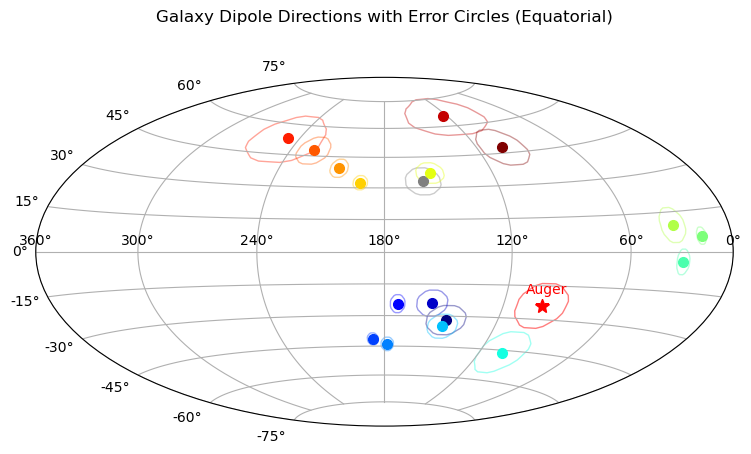

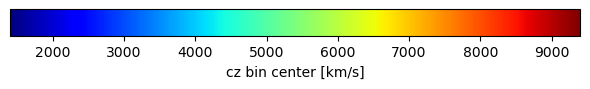

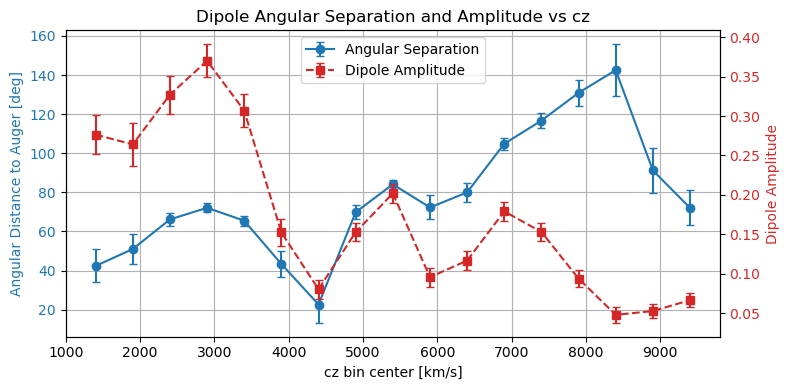

In [3]:
import numpy as np
from astropy.io import ascii
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u
from scipy.special import erfinv
import matplotlib.cm as cm
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from astropy.cosmology import FlatLambdaCDM
from astropy.table import Table
from matplotlib.patches import Ellipse

def read_catalog(path='../data/', 
                 name='2mrs_1175_done.dat', ncols=29):
  
  with open(path+name, 'r') as file:
    archivo = file.readlines()
    header  = [a.replace('#','').split() for a in archivo[:10]]
    lines   = archivo[10:]
  
  columns = header[-1]
  assert(len(columns) == ncols)
  print("Read %s\nColumns:" % name)
  print(columns)
  
  g = [[] for _ in range(ncols)]     
  for line in lines:
    values = line.split()
    g[0].append(            values[0]);   g[1].append(np.float32(values[1]));   g[2].append(np.float32(values[2]));
    g[3].append(np.float32( values[3]));  g[4].append(np.float32(values[4]));   g[5].append(np.float32(values[5]));
    g[6].append(np.float32( values[6]));  g[7].append(np.float32(values[7]));   g[8].append(np.float32(values[8]));
    g[9].append(np.float32( values[9]));  g[10].append(np.float32(values[10])); g[11].append(np.float32(values[11]));
    g[12].append(np.float32(values[12])); g[13].append(np.float32(values[13])); g[14].append(np.float32(values[14]));
    g[15].append(np.float32(values[15])); g[16].append(np.float32(values[16])); g[17].append(np.float32(values[17]));
    g[18].append(np.float32(values[18])); g[19].append(np.float32(values[19])); g[20].append(np.float32(values[20]));
    g[21].append(           values[21]) ; g[22].append(           values[22]);  g[23].append(values[23]); g[24].append(np.int32(values[24]));
    g[25].append(np.int32(  values[25])); g[26].append(           values[26]);  g[27].append(values[27]); g[28].append(         values[28])
  
  data = Table()
  for idx, col in enumerate(columns):
    data[col] = np.array(g[idx])

  data = data[data['v'] > 1200]  # Filter out galaxies with negative cz values

  # Create ks column for K-band absolute magnitude
  from astropy.constants import c
  cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Om0=0.3)
  comoving_dist = cosmo.comoving_distance((data['v']*u.km/u.s)/c) 
  data['ks']  = data['k_tc'] - 25 - 5*np.log10(comoving_dist.value*(1 + (data['v']*u.km/u.s)/c))  # K-band absolute magnitude

  data['_RAJ2000'] = data['RAdeg']  
  data['_DEJ2000'] = data['DECdeg']  
  data['cz'] = data['v']

  return data

# === Load galaxy catalogue ===
gxs = read_catalog()
RA_all = np.deg2rad(gxs['_RAJ2000'])
Dec_all = np.deg2rad(gxs['_DEJ2000'])
cz_all = gxs['cz']
#weights_all = np.ones(len(RA_all))
weights_all = 10**(-.4 * gxs['ks']) # Use K-band Luminosity as weights

# === Define cz bins ===
# cz_bins = [
#     (1200, 9000),       # Full sample
#     (1200, 3600),
#     (4000, 5000),
#     (9000, 9400)
# ]
cz_bins = [(cz, cz + 1000) for cz in range(900, 9000, 500)]
cz_bins.insert(0, (900, 9000))  # Add full sample as first bin

# === Setup colors and storage ===
n_bins = len(cz_bins)
dipole_results = {}
# Normalize cz range for colormap
cz_vals = [0.5 * (cz_min + cz_max) for (cz_min, cz_max) in cz_bins]
cz_norm = mcolors.Normalize(vmin=min(cz_vals[1:]), vmax=max(cz_vals[1:]))  # exclude full sample from colormap range
cmap = cm.jet  # or try 'viridis', 'turbo', 'cividis'

# === Auger reference dipole ===
auger_RA = 100.0
auger_Dec = -24.0
auger_coord = SkyCoord(ra=auger_RA * u.deg, dec=auger_Dec * u.deg, frame='icrs')
auger_error_deg = 10.0  # Typical uncertainty in Auger dipole direction
auger_error_ra_deg = 10.0  # Uncertainty in RA
auger_error_dec_deg = 13.0  # Uncertainty in Dec

# === Loop through bins ===
for i, (cz_min, cz_max) in enumerate(cz_bins):
    label = "Full Sample" if i == 0 else f"{cz_min}-{cz_max} km/s"
    cz_mid = 0.5 * (cz_min + cz_max)
    color = 'gray' if i == 0 else cmap(cz_norm(cz_mid))  # gray for full sample, colormap for bins

    # Filter galaxies
    mask = (cz_all > cz_min) & (cz_all < cz_max)
    RA = RA_all[mask]
    Dec = Dec_all[mask]
    weights = weights_all[mask]

    if len(RA) < 10:
        print(f"Skipping {label} — too few galaxies ({len(RA)})")
        continue

    W = np.sum(weights)

    # === 2D Rayleigh dipole ===
    a_alpha = (2.0 / W) * np.sum(weights * np.cos(RA))
    b_alpha = (2.0 / W) * np.sum(weights * np.sin(RA))
    r_alpha = np.sqrt(a_alpha**2 + b_alpha**2)
    phi_alpha_deg = np.rad2deg(np.arctan2(b_alpha, a_alpha) % (2 * np.pi))

    # === 3D dipole direction ===
    x = np.cos(Dec) * np.cos(RA)
    y = np.cos(Dec) * np.sin(RA)
    z = np.sin(Dec)
    X = np.sum(weights * x)
    Y = np.sum(weights * y)
    Z = np.sum(weights * z)
    norm = np.sqrt(X**2 + Y**2 + Z**2)
    X /= norm
    Y /= norm
    Z /= norm

    dipole_amp = norm / W
    alpha_d = (np.arctan2(Y, X) % (2 * np.pi)) * 180 / np.pi
    delta_d = np.arcsin(Z) * 180 / np.pi

    # === Uncertainty and significance ===
    Weff = W**2 / np.sum(weights**2)                # Effective weight
    sigma_r = np.sqrt(2 / Weff)                     # Uncertainty in radial component
    sigma_phi_deg = np.rad2deg(sigma_r / r_alpha)   # Rough approximation
    sigma_dec_deg = sigma_phi_deg                   # rough approximation
    P_rayleigh = np.exp(-Weff * r_alpha**2 / 4)     # Rayleigh p-value
    Zsig = np.sqrt(2) * erfinv(1 - 2 * P_rayleigh)  # Gaussian significance

    # === Angular separation from Auger dipole ===
    dip_coord = SkyCoord(ra=alpha_d * u.deg, dec=delta_d * u.deg, frame='icrs')
    separation = dip_coord.separation(auger_coord).deg

    # === Store results ===
    dipole_results[label] = {
        'RA': alpha_d,
        'Dec': delta_d,
        'r_alpha': r_alpha,
        'd_perp': dipole_amp,
        'sigma_r': sigma_r,
        'sigma_phi': sigma_phi_deg,
        'sigma_dec': sigma_dec_deg,
        'Z': Zsig,
        'P': P_rayleigh,
        'separation': separation,
        'N': len(RA),
        'color': color
    }

    # === Bootstrap dipole errors ===
    n_bootstrap = 500
    dipole_ras = []
    dipole_decs = []
    dipole_amps_bs = []
    sep_bs = []

    for _ in range(n_bootstrap):
        indices = np.random.choice(len(RA), size=len(RA), replace=True)
        RA_bs = RA[indices]
        Dec_bs = Dec[indices]
        weights_bs = weights[indices]

        x = np.cos(Dec_bs) * np.cos(RA_bs)
        y = np.cos(Dec_bs) * np.sin(RA_bs)
        z = np.sin(Dec_bs)

        X = np.sum(weights_bs * x)
        Y = np.sum(weights_bs * y)
        Z = np.sum(weights_bs * z)
        norm = np.sqrt(X**2 + Y**2 + Z**2)
        X /= norm
        Y /= norm
        Z /= norm

        amp = norm / np.sum(weights_bs)
        ra_bs = (np.arctan2(Y, X) % (2 * np.pi)) * 180 / np.pi
        dec_bs = np.arcsin(Z) * 180 / np.pi

        dipole_ras.append(ra_bs)
        dipole_decs.append(dec_bs)
        dipole_amps_bs.append(amp)

        # Angular separation with Auger dipole
        dip_coord_bs = SkyCoord(ra=ra_bs * u.deg, dec=dec_bs * u.deg, frame='icrs')
        sep = dip_coord_bs.separation(auger_coord).deg
        sep_bs.append(sep)

    # === Bootstrap uncertainties ===
    sigma_ra_boot = np.std(dipole_ras)
    sigma_dec_boot = np.std(dipole_decs)
    sigma_amp_boot = np.std(dipole_amps_bs)
    sigma_sep_boot = np.std(sep_bs)

    dipole_results[label].update({
        'sigma_ra_boot': sigma_ra_boot,
        'sigma_dec_boot': sigma_dec_boot,
        'sigma_amp_boot': sigma_amp_boot,
        'sigma_sep_boot': sigma_sep_boot
    })

    # === Print result ===
    print(f"\n=== Dipole for {label} ===")
    print(f"N = {len(RA)} galaxies")
    print(f"RA = {alpha_d:.2f}° ± {sigma_phi_deg:.2f}° (± {sigma_ra_boot:.2f}° bootstrapped)")
    print(f"Dec = {delta_d:.2f}° ± {sigma_dec_deg:.2f}° (± {sigma_dec_boot:.2f}° bootstrapped)")
    print(f"Amplitude = {dipole_amp:.4f} ± {sigma_amp_boot:.4f}")
    print(f"Significance = {Zsig:.2f} sigma (p = {P_rayleigh:.2e})")
    print(f"Angular separation from Auger = {separation:.2f}° ± {sigma_sep_boot:.2f}°")

# === Plot Dipoles ===
plt.figure(figsize=(9, 5))
ax = plt.subplot(111, projection='hammer')
ax.grid(True)

xticks_deg = [360, 300, 240, 180, 120, 60, 0]
xticks_rad = -np.radians(xticks_deg) + np.pi
ax.set_xticks(xticks_rad)
ax.set_xticklabels([f"{d}°" for d in xticks_deg])



for label, res in dipole_results.items():
    ra_rad = np.deg2rad(res['RA'])
    dec_rad = np.deg2rad(res['Dec'])
#    ra_plot = -(ra_rad - np.pi)
    ra_plot = -ra_rad + np.pi  # <- RA increases right to left

    color = res['color']

    amp = res['d_perp']  # Dipole amplitude (scalar)

    # Plot point
    ax.plot(ra_plot, dec_rad, 'o', color=color, label=label, markersize=7)

    # Error circle
    # radius = np.deg2rad(res['sigma_phi'])
    # circle = plt.Circle((ra_plot, dec_rad), radius,
    #                     transform=ax.transData, edgecolor=color,
    #                     facecolor='none', alpha=0.4)
    # ax.add_patch(circle)

    # Error Ellipse
    ellipse = Ellipse(
        (ra_plot, dec_rad),
        width=2*np.deg2rad(res['sigma_ra_boot']),
        height=2*np.deg2rad(res['sigma_dec_boot']),
        angle=0,
        edgecolor=color,
        facecolor='none',
        alpha=0.4,
        transform=ax.transData
    )
    ax.add_patch(ellipse)

    #ax.text(ra_plot, dec_rad + 0.15, label, ha='center', color=color)


# === Auger Dipole ===
auger_ra_rad = np.deg2rad(auger_RA)
auger_dec_rad = np.deg2rad(auger_Dec)
#auger_ra_plot = -(auger_ra_rad - np.pi)
auger_ra_plot = -np.deg2rad(auger_RA) + np.pi
ax.plot(auger_ra_plot, auger_dec_rad, 'r*', markersize=10, label='Auger Dipole')

# # Auger error circle
# auger_radius = np.deg2rad(auger_error_deg)
# circle = plt.Circle((auger_ra_plot, auger_dec_rad), auger_radius,
#                     transform=ax.transData, edgecolor='red',
#                     facecolor='none', linestyle='--', alpha=0.5)
# ax.add_patch(circle)

# Auger error Ellipse
ellipse = Ellipse(
    (auger_ra_plot, auger_dec_rad),
    width=2*np.deg2rad(auger_error_dec_deg),
    height=2*np.deg2rad(auger_error_ra_deg),
    angle=0,
    edgecolor='red',
    facecolor='none',
    alpha=0.5,
    transform=ax.transData
)
ax.add_patch(ellipse)

ax.text(auger_ra_plot, auger_dec_rad + 0.1, "Auger", ha='center', color='red')

#plt.text(-3.1, -1.8, "Arrow length ∝ Dipole amplitude", fontsize=9)

plt.title("Galaxy Dipole Directions with Error Circles (Equatorial)", pad=40)
#plt.legend(loc='lower left', fontsize='small')
#plt.tight_layout()
#plt.show()

# === Add cz colorbar ===
fig, ax_cb = plt.subplots(figsize=(6, 1))
cb1 = cm.ScalarMappable(norm=cz_norm, cmap=cmap)
cbar = plt.colorbar(cb1, cax=ax_cb, orientation='horizontal')
cbar.set_label("cz bin center [km/s]")
plt.tight_layout()
plt.show()

# === Plot dipole amplitude and angular distance vs cz bin center ===
cz_bin_centers = []
angular_separations = []
dipole_amps = []
ang_diam_dists = []

# Define a cosmology (e.g., a Flat Lambda-CDM model with specific parameters)
cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Om0=0.3)

for label, res in dipole_results.items():
    if label == "Full Sample":
        continue  # skip full sample

    cz_mid = 0.5 * (int(label.split('-')[0]), int(label.split('-')[1].split()[0]))[0] + \
             0.5 * (int(label.split('-')[0]), int(label.split('-')[1].split()[0]))[1]
    cz_bin_centers.append(cz_mid)
    angular_separations.append(res['separation'])
    dipole_amps.append(res['d_perp'])

    # Convert cz_mid to angular diameter distance
    z = cz_mid / 3e5  # use cz/c as redshift
    d_ang = cosmo.angular_diameter_distance(z).value  # in Mpc
    ang_diam_dists.append(d_ang)


# === Plots ===
fig, ax1 = plt.subplots(figsize=(8, 4))

# X-axis
x = cz_bin_centers

# === Left Y-axis: Angular separation ===
color = 'C00'
separation_errors = [dipole_results[label]['sigma_sep_boot'] for label in dipole_results if label != "Full Sample"]
ln1 = ax1.errorbar(x, angular_separations, yerr=separation_errors, fmt='o-', color=color, capsize=3, label='Angular Separation')
ax1.set_ylabel("Angular Distance to Auger [deg]", color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

# === Right Y-axis: Dipole amplitude ===
color = 'C03'
ax2 = ax1.twinx()
dipole_amp_errors = [dipole_results[label]['sigma_amp_boot'] for label in dipole_results if label != "Full Sample"]
ln2 = ax2.errorbar(x, dipole_amps, yerr=dipole_amp_errors, fmt='s--', color=color, capsize=3, label='Dipole Amplitude')
ax2.set_ylabel("Dipole Amplitude", color=color)
ax2.tick_params(axis='y', labelcolor=color)

# === X-axis label ===
ax1.set_xlabel("cz bin center [km/s]")

# === Legend ===
# lines = [ln1.lines[0], ln2.lines[0]]
# labels = [line.get_label() for line in lines]
# ax1.legend(lines, labels, loc='best')

lines = [ln1, ln2]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper center')

plt.title("Dipole Angular Separation and Amplitude vs cz")
plt.tight_layout()
plt.show()



No rodajas, sino <cz

Read 2mrs_1175_done.dat
Columns:
['ID', 'RAdeg', 'DECdeg', 'l', 'b', 'k_c', 'h_c', 'j_c', 'k_tc', 'h_tc', 'j_tc', 'e_k', 'e_h', 'e_j', 'e_kt', 'e_ht', 'e_jt', 'e_bv', 'r_iso', 'r_ext', 'b/a', 'flgs', 'type', 'ts', 'v', 'e_v', 'c', 'vsrc', 'CAT_ID']

=== Dipole for Full Sample ===
N = 24334 galaxies
RA = 159.24° ± 8.20° (± 8.69° bootstrapped)
Dec = 36.52° ± 8.20° (± 6.51° bootstrapped)
Amplitude = 0.0409 ± 0.0047
Significance = 6.57 sigma (p = 2.53e-11)
Angular separation from Auger = 82.33° ± 6.04°

=== Dipole for 2200 km/s ===
N = 1290 galaxies
RA = 154.23° ± 6.11° (± 6.67° bootstrapped)
Dec = -24.54° ± 6.11° (± 5.29° bootstrapped)
Amplitude = 0.3000 ± 0.0233
Significance = inf sigma (p = 7.84e-20)
Angular separation from Auger = 49.10° ± 6.46°

=== Dipole for 3200 km/s ===
N = 2918 galaxies
RA = 172.79° ± 3.67° (± 3.05° bootstrapped)
Dec = -33.79° ± 3.67° (± 3.15° bootstrapped)
Amplitude = 0.3288 ± 0.0181
Significance = inf sigma (p = 1.02e-53)
Angular separation from Auger = 63.20° 

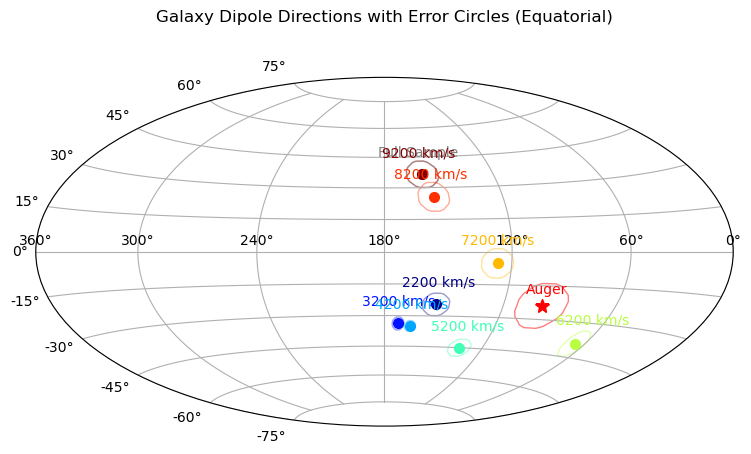

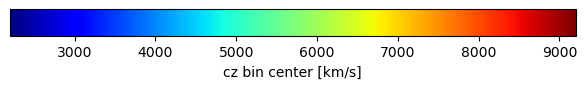

[2200 3200 4200 5200 6200 7200 8200 9200]


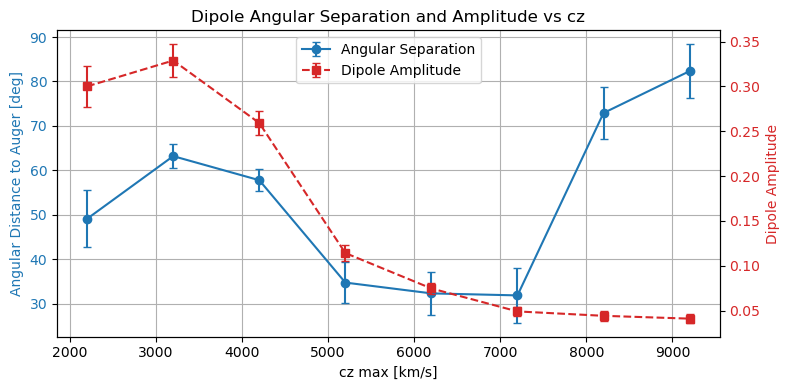

In [7]:
import numpy as np
from astropy.io import ascii
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u
from scipy.special import erfinv
import matplotlib.cm as cm
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from astropy.cosmology import FlatLambdaCDM
from astropy.table import Table
from matplotlib.patches import Ellipse

def read_catalog(path='../data/', 
                 name='2mrs_1175_done.dat', ncols=29):
  
  with open(path+name, 'r') as file:
    archivo = file.readlines()
    header  = [a.replace('#','').split() for a in archivo[:10]]
    lines   = archivo[10:]
  
  columns = header[-1]
  assert(len(columns) == ncols)
  print("Read %s\nColumns:" % name)
  print(columns)
  
  g = [[] for _ in range(ncols)]     
  for line in lines:
    values = line.split()
    g[0].append(            values[0]);   g[1].append(np.float32(values[1]));   g[2].append(np.float32(values[2]));
    g[3].append(np.float32( values[3]));  g[4].append(np.float32(values[4]));   g[5].append(np.float32(values[5]));
    g[6].append(np.float32( values[6]));  g[7].append(np.float32(values[7]));   g[8].append(np.float32(values[8]));
    g[9].append(np.float32( values[9]));  g[10].append(np.float32(values[10])); g[11].append(np.float32(values[11]));
    g[12].append(np.float32(values[12])); g[13].append(np.float32(values[13])); g[14].append(np.float32(values[14]));
    g[15].append(np.float32(values[15])); g[16].append(np.float32(values[16])); g[17].append(np.float32(values[17]));
    g[18].append(np.float32(values[18])); g[19].append(np.float32(values[19])); g[20].append(np.float32(values[20]));
    g[21].append(           values[21]) ; g[22].append(           values[22]);  g[23].append(values[23]); g[24].append(np.int32(values[24]));
    g[25].append(np.int32(  values[25])); g[26].append(           values[26]);  g[27].append(values[27]); g[28].append(         values[28])
  
  data = Table()
  for idx, col in enumerate(columns):
    data[col] = np.array(g[idx])

  data = data[data['v'] > 1200]  # Filter out galaxies with negative cz values

  # Create ks column for K-band absolute magnitude
  from astropy.constants import c
  cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Om0=0.3)
  comoving_dist = cosmo.comoving_distance((data['v']*u.km/u.s)/c) 
  data['ks']  = data['k_tc'] - 25 - 5*np.log10(comoving_dist.value*(1 + (data['v']*u.km/u.s)/c))  # K-band absolute magnitude

  data['_RAJ2000'] = data['RAdeg']  
  data['_DEJ2000'] = data['DECdeg']  
  data['cz'] = data['v']

  return data

# === Load galaxy catalogue ===
gxs = read_catalog()
RA_all = np.deg2rad(gxs['_RAJ2000'])
Dec_all = np.deg2rad(gxs['_DEJ2000'])
cz_all = gxs['cz']
#weights_all = np.ones(len(RA_all))
weights_all = 10**(-.4 * gxs['ks']) # Use K-band Luminosity as weights

# === Define cz bins ===
# cz_bins = [
#     (1200, 9000),       # Full sample
#     (1200, 3600),
#     (4000, 5000),
#     (9000, 9400)
# ]
cz_bins = [(1200, max_cz) for max_cz in range(2200, 10200, 1000)]
cz_bins.insert(0, (1200, 9200))  # optional full sample bin

# === Setup colors and storage ===
n_bins = len(cz_bins)
dipole_results = {}
# Normalize cz range for colormap
cz_vals = [cz_max for (cz_min, cz_max) in cz_bins]
cz_norm = mcolors.Normalize(vmin=min(cz_vals[1:]), vmax=max(cz_vals[1:]))  # exclude full sample from colormap range
cmap = cm.jet  # or try 'viridis', 'turbo', 'cividis'

# === Auger reference dipole ===
auger_RA = 100.0
auger_Dec = -24.0
auger_coord = SkyCoord(ra=auger_RA * u.deg, dec=auger_Dec * u.deg, frame='icrs')
auger_error_deg = 10.0  # Typical uncertainty in Auger dipole direction
auger_error_ra_deg = 10.0  # Uncertainty in RA
auger_error_dec_deg = 13.0  # Uncertainty in Dec

# === Loop through bins ===
for i, (cz_min, cz_max) in enumerate(cz_bins):
    label = "Full Sample" if i == 0 else f"{cz_max} km/s"
    cz_mid = cz_max
    color = 'gray' if i == 0 else cmap(cz_norm(cz_mid))  # gray for full sample, colormap for bins

    # Filter galaxies
    mask = (cz_all > cz_min) & (cz_all < cz_max)
    RA = RA_all[mask]
    Dec = Dec_all[mask]
    weights = weights_all[mask]

    if len(RA) < 10:
        print(f"Skipping {label} — too few galaxies ({len(RA)})")
        continue

    W = np.sum(weights)

    # === 2D Rayleigh dipole ===
    a_alpha = (2.0 / W) * np.sum(weights * np.cos(RA))
    b_alpha = (2.0 / W) * np.sum(weights * np.sin(RA))
    r_alpha = np.sqrt(a_alpha**2 + b_alpha**2)
    phi_alpha_deg = np.rad2deg(np.arctan2(b_alpha, a_alpha) % (2 * np.pi))

    # === 3D dipole direction ===
    x = np.cos(Dec) * np.cos(RA)
    y = np.cos(Dec) * np.sin(RA)
    z = np.sin(Dec)
    X = np.sum(weights * x)
    Y = np.sum(weights * y)
    Z = np.sum(weights * z)
    norm = np.sqrt(X**2 + Y**2 + Z**2)
    X /= norm
    Y /= norm
    Z /= norm

    dipole_amp = norm / W
    alpha_d = (np.arctan2(Y, X) % (2 * np.pi)) * 180 / np.pi
    delta_d = np.arcsin(Z) * 180 / np.pi

    # === Uncertainty and significance ===
    Weff = W**2 / np.sum(weights**2)                # Effective weight
    sigma_r = np.sqrt(2 / Weff)                     # Uncertainty in radial component
    sigma_phi_deg = np.rad2deg(sigma_r / r_alpha)   # Rough approximation
    sigma_dec_deg = sigma_phi_deg                   # rough approximation
    P_rayleigh = np.exp(-Weff * r_alpha**2 / 4)     # Rayleigh p-value
    Zsig = np.sqrt(2) * erfinv(1 - 2 * P_rayleigh)  # Gaussian significance

    # === Angular separation from Auger dipole ===
    dip_coord = SkyCoord(ra=alpha_d * u.deg, dec=delta_d * u.deg, frame='icrs')
    separation = dip_coord.separation(auger_coord).deg

    # === Store results ===
    dipole_results[label] = {
        'RA': alpha_d,
        'Dec': delta_d,
        'r_alpha': r_alpha,
        'd_perp': dipole_amp,
        'sigma_r': sigma_r,
        'sigma_phi': sigma_phi_deg,
        'sigma_dec': sigma_dec_deg,
        'Z': Zsig,
        'P': P_rayleigh,
        'separation': separation,
        'N': len(RA),
        'color': color
    }

    # === Bootstrap dipole errors ===
    n_bootstrap = 500
    dipole_ras = []
    dipole_decs = []
    dipole_amps_bs = []
    sep_bs = []

    for _ in range(n_bootstrap):
        indices = np.random.choice(len(RA), size=len(RA), replace=True)
        RA_bs = RA[indices]
        Dec_bs = Dec[indices]
        weights_bs = weights[indices]

        x = np.cos(Dec_bs) * np.cos(RA_bs)
        y = np.cos(Dec_bs) * np.sin(RA_bs)
        z = np.sin(Dec_bs)

        X = np.sum(weights_bs * x)
        Y = np.sum(weights_bs * y)
        Z = np.sum(weights_bs * z)
        norm = np.sqrt(X**2 + Y**2 + Z**2)
        X /= norm
        Y /= norm
        Z /= norm

        amp = norm / np.sum(weights_bs)
        ra_bs = (np.arctan2(Y, X) % (2 * np.pi)) * 180 / np.pi
        dec_bs = np.arcsin(Z) * 180 / np.pi

        dipole_ras.append(ra_bs)
        dipole_decs.append(dec_bs)
        dipole_amps_bs.append(amp)

        # Angular separation with Auger dipole
        dip_coord_bs = SkyCoord(ra=ra_bs * u.deg, dec=dec_bs * u.deg, frame='icrs')
        sep = dip_coord_bs.separation(auger_coord).deg
        sep_bs.append(sep)

    # === Bootstrap uncertainties ===
    sigma_ra_boot = np.std(dipole_ras)
    sigma_dec_boot = np.std(dipole_decs)
    sigma_amp_boot = np.std(dipole_amps_bs)
    sigma_sep_boot = np.std(sep_bs)

    dipole_results[label].update({
        'sigma_ra_boot': sigma_ra_boot,
        'sigma_dec_boot': sigma_dec_boot,
        'sigma_amp_boot': sigma_amp_boot,
        'sigma_sep_boot': sigma_sep_boot
    })

    # === Print result ===
    print(f"\n=== Dipole for {label} ===")
    print(f"N = {len(RA)} galaxies")
    print(f"RA = {alpha_d:.2f}° ± {sigma_phi_deg:.2f}° (± {sigma_ra_boot:.2f}° bootstrapped)")
    print(f"Dec = {delta_d:.2f}° ± {sigma_dec_deg:.2f}° (± {sigma_dec_boot:.2f}° bootstrapped)")
    print(f"Amplitude = {dipole_amp:.4f} ± {sigma_amp_boot:.4f}")
    print(f"Significance = {Zsig:.2f} sigma (p = {P_rayleigh:.2e})")
    print(f"Angular separation from Auger = {separation:.2f}° ± {sigma_sep_boot:.2f}°")

# === Plot Dipoles ===
plt.figure(figsize=(9, 5))
ax = plt.subplot(111, projection='hammer')
ax.grid(True)

xticks_deg = [360, 300, 240, 180, 120, 60, 0]
xticks_rad = -np.radians(xticks_deg) + np.pi
ax.set_xticks(xticks_rad)
ax.set_xticklabels([f"{d}°" for d in xticks_deg])



for label, res in dipole_results.items():
    ra_rad = np.deg2rad(res['RA'])
    dec_rad = np.deg2rad(res['Dec'])
#    ra_plot = -(ra_rad - np.pi)
    ra_plot = -ra_rad + np.pi  # <- RA increases right to left

    color = res['color']

    amp = res['d_perp']  # Dipole amplitude (scalar)

    # Plot point
    ax.plot(ra_plot, dec_rad, 'o', color=color, label=label, markersize=7)

    # Error circle
    # radius = np.deg2rad(res['sigma_phi'])
    # circle = plt.Circle((ra_plot, dec_rad), radius,
    #                     transform=ax.transData, edgecolor=color,
    #                     facecolor='none', alpha=0.4)
    # ax.add_patch(circle)

    # Error Ellipse
    ellipse = Ellipse(
        (ra_plot, dec_rad),
        width=2*np.deg2rad(res['sigma_ra_boot']),
        height=2*np.deg2rad(res['sigma_dec_boot']),
        angle=0,
        edgecolor=color,
        facecolor='none',
        alpha=0.4,
        transform=ax.transData
    )
    ax.add_patch(ellipse)

    ax.text(ra_plot, dec_rad + 0.15, label, ha='center', color=color)


# === Auger Dipole ===
auger_ra_rad = np.deg2rad(auger_RA)
auger_dec_rad = np.deg2rad(auger_Dec)
#auger_ra_plot = -(auger_ra_rad - np.pi)
auger_ra_plot = -np.deg2rad(auger_RA) + np.pi
ax.plot(auger_ra_plot, auger_dec_rad, 'r*', markersize=10, label='Auger Dipole')


# Auger error Ellipse
ellipse = Ellipse(
    (auger_ra_plot, auger_dec_rad),
    width=2*np.deg2rad(auger_error_dec_deg),
    height=2*np.deg2rad(auger_error_ra_deg),
    angle=0,
    edgecolor='red',
    facecolor='none',
    alpha=0.5,
    transform=ax.transData
)
ax.add_patch(ellipse)

ax.text(auger_ra_plot, auger_dec_rad + 0.1, "Auger", ha='center', color='red')

plt.title("Galaxy Dipole Directions with Error Circles (Equatorial)", pad=40)

# === Add cz colorbar ===
fig, ax_cb = plt.subplots(figsize=(6, 1))
cb1 = cm.ScalarMappable(norm=cz_norm, cmap=cmap)
cbar = plt.colorbar(cb1, cax=ax_cb, orientation='horizontal')
cbar.set_label("cz bin center [km/s]")
plt.tight_layout()
plt.show()

# === Plot dipole amplitude and angular distance vs cz bin center ===
#cz_bin_centers = []
angular_separations = []
dipole_amps = []
ang_diam_dists = []

# Define a cosmology (e.g., a Flat Lambda-CDM model with specific parameters)
cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Om0=0.3)

for label, res in dipole_results.items():
    if label == "Full Sample":
        continue  # skip full sample

    #cz_mid = 0.5 * (int(label.split('-')[0]), int(label.split('-')[1].split()[0]))[0] + \
    #         0.5 * (int(label.split('-')[0]), int(label.split('-')[1].split()[0]))[1]
    #cz_bin_centers.append(cz_mid)
    angular_separations.append(res['separation'])
    dipole_amps.append(res['d_perp'])

    # Convert cz_mid to angular diameter distance
    z = cz_mid / 3e5  # use cz/c as redshift
    d_ang = cosmo.angular_diameter_distance(z).value  # in Mpc
    ang_diam_dists.append(d_ang)


# === Plots ===
fig, ax1 = plt.subplots(figsize=(8, 4))

# X-axis
x = np.array([cz_max for (cz_min, cz_max) in cz_bins[1:]])
print(x)

# === Left Y-axis: Angular separation ===
color = 'C00'
separation_errors = [dipole_results[label]['sigma_sep_boot'] for label in dipole_results if label != "Full Sample"]
ln1 = ax1.errorbar(x, angular_separations, yerr=separation_errors, fmt='o-', color=color, capsize=3, label='Angular Separation')
ax1.set_ylabel("Angular Distance to Auger [deg]", color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

# === Right Y-axis: Dipole amplitude ===
color = 'C03'
ax2 = ax1.twinx()
dipole_amp_errors = [dipole_results[label]['sigma_amp_boot'] for label in dipole_results if label != "Full Sample"]
ln2 = ax2.errorbar(x, dipole_amps, yerr=dipole_amp_errors, fmt='s--', color=color, capsize=3, label='Dipole Amplitude')
ax2.set_ylabel("Dipole Amplitude", color=color)
ax2.tick_params(axis='y', labelcolor=color)

# === X-axis label ===
ax1.set_xlabel("cz max [km/s]")

# === Legend ===
# lines = [ln1.lines[0], ln2.lines[0]]
# labels = [line.get_label() for line in lines]
# ax1.legend(lines, labels, loc='best')

lines = [ln1, ln2]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper center')

plt.title("Dipole Angular Separation and Amplitude vs cz")
plt.tight_layout()
plt.show()



Esto muestra que es mejor ver las cáscaras. Varias cáscaras alrededor del dipolo Auger puede dar la ilusión de una gran cáscara muy cerca del Auger


Ahora quiero plotear el flujo debajo de los dipolos

Read 2mrs_1175_done.dat
Columns:
['ID', 'RAdeg', 'DECdeg', 'l', 'b', 'k_c', 'h_c', 'j_c', 'k_tc', 'h_tc', 'j_tc', 'e_k', 'e_h', 'e_j', 'e_kt', 'e_ht', 'e_jt', 'e_bv', 'r_iso', 'r_ext', 'b/a', 'flgs', 'type', 'ts', 'v', 'e_v', 'c', 'vsrc', 'CAT_ID']

=== Dipole for Full Sample ===
N = 23498 galaxies
RA = 159.47° ± 8.23° (± 8.85° bootstrapped)
Dec = 33.09° ± 8.23° (± 6.72° bootstrapped)
Amplitude = 0.0394 ± 0.0052
Significance = 6.54 sigma (p = 3.06e-11)
Angular separation from Auger = 80.40° ± 6.47°

=== Dipole for 1000-2000 km/s ===
N = 1046 galaxies
RA = 151.05° ± 7.78° (± 8.16° bootstrapped)
Dec = -27.72° ± 7.78° (± 6.09° bootstrapped)
Amplitude = 0.2770 ± 0.0247
Significance = 6.97 sigma (p = 1.64e-12)
Angular separation from Auger = 45.77° ± 7.45°

=== Dipole for 1500-2500 km/s ===
N = 1310 galaxies
RA = 157.73° ± 6.57° (± 6.30° bootstrapped)
Dec = -19.24° ± 6.57° (± 5.24° bootstrapped)
Amplitude = 0.2696 ± 0.0262
Significance = 8.29 sigma (p = 3.06e-17)
Angular separation from Aug

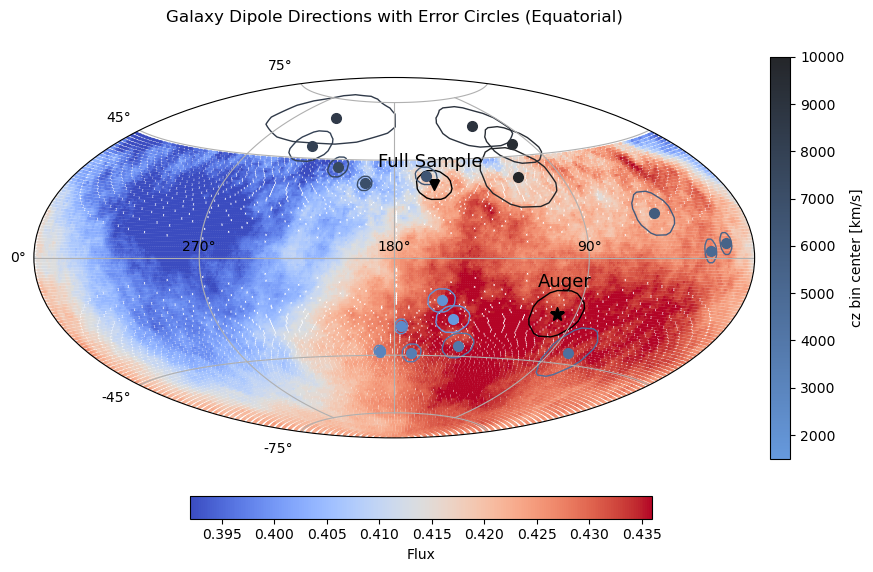

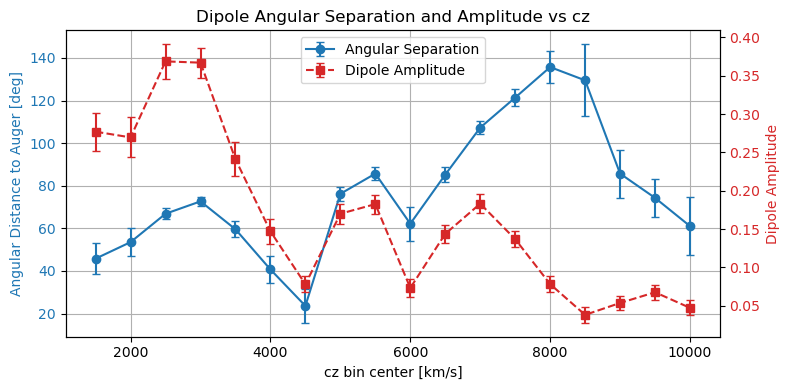

In [8]:
import numpy as np
from astropy.io import ascii
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u
from scipy.special import erfinv
import matplotlib.cm as cm
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from astropy.cosmology import FlatLambdaCDM
from astropy.table import Table
from matplotlib.patches import Ellipse
import matplotlib.colors as colors
from matplotlib.cm import ScalarMappable

def read_catalog(path='../data/', 
                 name='2mrs_1175_done.dat', ncols=29):
  
  with open(path+name, 'r') as file:
    archivo = file.readlines()
    header  = [a.replace('#','').split() for a in archivo[:10]]
    lines   = archivo[10:]
  
  columns = header[-1]
  assert(len(columns) == ncols)
  print("Read %s\nColumns:" % name)
  print(columns)
  
  g = [[] for _ in range(ncols)]     
  for line in lines:
    values = line.split()
    g[0].append(            values[0]);   g[1].append(np.float32(values[1]));   g[2].append(np.float32(values[2]));
    g[3].append(np.float32( values[3]));  g[4].append(np.float32(values[4]));   g[5].append(np.float32(values[5]));
    g[6].append(np.float32( values[6]));  g[7].append(np.float32(values[7]));   g[8].append(np.float32(values[8]));
    g[9].append(np.float32( values[9]));  g[10].append(np.float32(values[10])); g[11].append(np.float32(values[11]));
    g[12].append(np.float32(values[12])); g[13].append(np.float32(values[13])); g[14].append(np.float32(values[14]));
    g[15].append(np.float32(values[15])); g[16].append(np.float32(values[16])); g[17].append(np.float32(values[17]));
    g[18].append(np.float32(values[18])); g[19].append(np.float32(values[19])); g[20].append(np.float32(values[20]));
    g[21].append(           values[21]) ; g[22].append(           values[22]);  g[23].append(values[23]); g[24].append(np.int32(values[24]));
    g[25].append(np.int32(  values[25])); g[26].append(           values[26]);  g[27].append(values[27]); g[28].append(         values[28])
  
  data = Table()
  for idx, col in enumerate(columns):
    data[col] = np.array(g[idx])

  data = data[data['v'] > 1200]  # Filter out galaxies with negative cz values

  # Create ks column for K-band absolute magnitude
  from astropy.constants import c
  cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Om0=0.3)
  comoving_dist = cosmo.comoving_distance((data['v']*u.km/u.s)/c) 
  data['ks']  = data['k_tc'] - 25 - 5*np.log10(comoving_dist.value*(1 + (data['v']*u.km/u.s)/c))  # K-band absolute magnitude

  data['_RAJ2000'] = data['RAdeg']  
  data['_DEJ2000'] = data['DECdeg']  
  data['cz'] = data['v']

  return data

# === Load galaxy catalogue ===
gxs = read_catalog()
RA_all = np.deg2rad(gxs['_RAJ2000'])
Dec_all = np.deg2rad(gxs['_DEJ2000'])
cz_all = gxs['cz']
#weights_all = np.ones(len(RA_all))
weights_all = 10**(-.4 * gxs['ks']) # Use K-band Luminosity as weights

# === Load flux cataloge ===
# Load flux data
file_path = "../data/Auger/flux_a8_lb.dat"
flux_cat = np.loadtxt(file_path)

# Columns: Dec, RA, Flux, Flux_unc, Gal_l, Gal_b
flux_dec = flux_cat[:, 0]
flux_ra = flux_cat[:, 1]
flux_val = flux_cat[:, 2]

# Convert to radians
ra_rad = np.radians(flux_ra)
dec_rad = np.radians(flux_dec)

# Shift RA to put RA=0° on right edge, increase leftward
ra_shifted = np.remainder(ra_rad + np.pi, 2 * np.pi)
ra_shifted[ra_shifted > np.pi] -= 2 * np.pi
ra_shifted = -ra_shifted  # flip to increase leftward


# === Define cz bins ===
# cz_bins = [
#     (1200, 9000),       # Full sample
#     (1200, 3600),
#     (4000, 5000),
#     (9000, 9400)
# ]
cz_bins = [(cz, cz + 1000) for cz in range(1000, 10000, 500)]
cz_bins.insert(0, (900, 9000))  # Add full sample as first bin

# === Setup colors and storage ===
n_bins = len(cz_bins)
dipole_results = {}
# Normalize cz range for colormap
cz_vals = [0.5 * (cz_min + cz_max) for (cz_min, cz_max) in cz_bins]
cz_norm = mcolors.Normalize(vmin=min(cz_vals[1:]), vmax=max(cz_vals[1:]))  # exclude full sample from colormap range
#cmap = cm.Greens  # or try 'viridis', 'turbo', 'cividis'
import seaborn as sns
cmap = sns.dark_palette("#69d", reverse=True, as_cmap=True)

# === Auger reference dipole ===
auger_RA = 100.0
auger_Dec = -24.0
auger_coord = SkyCoord(ra=auger_RA * u.deg, dec=auger_Dec * u.deg, frame='icrs')
auger_error_deg = 10.0  # Typical uncertainty in Auger dipole direction
auger_error_ra_deg = 10.0  # Uncertainty in RA
auger_error_dec_deg = 13.0  # Uncertainty in Dec

# === Loop through bins ===
for i, (cz_min, cz_max) in enumerate(cz_bins):
    label = "Full Sample" if i == 0 else f"{cz_min}-{cz_max} km/s"
    cz_mid = 0.5 * (cz_min + cz_max)
    color = 'k' if i == 0 else cmap(cz_norm(cz_mid))  # gray for full sample, colormap for bins

    # Filter galaxies
    mask = (cz_all > cz_min) & (cz_all < cz_max)
    RA = RA_all[mask]
    Dec = Dec_all[mask]
    weights = weights_all[mask]

    if len(RA) < 10:
        print(f"Skipping {label} — too few galaxies ({len(RA)})")
        continue

    W = np.sum(weights)

    # === 2D Rayleigh dipole ===
    a_alpha = (2.0 / W) * np.sum(weights * np.cos(RA))
    b_alpha = (2.0 / W) * np.sum(weights * np.sin(RA))
    r_alpha = np.sqrt(a_alpha**2 + b_alpha**2)
    phi_alpha_deg = np.rad2deg(np.arctan2(b_alpha, a_alpha) % (2 * np.pi))

    # === 3D dipole direction ===
    x = np.cos(Dec) * np.cos(RA)
    y = np.cos(Dec) * np.sin(RA)
    z = np.sin(Dec)
    X = np.sum(weights * x)
    Y = np.sum(weights * y)
    Z = np.sum(weights * z)
    norm = np.sqrt(X**2 + Y**2 + Z**2)
    X /= norm
    Y /= norm
    Z /= norm

    dipole_amp = norm / W
    alpha_d = (np.arctan2(Y, X) % (2 * np.pi)) * 180 / np.pi
    delta_d = np.arcsin(Z) * 180 / np.pi

    # === Uncertainty and significance ===
    Weff = W**2 / np.sum(weights**2)                # Effective weight
    sigma_r = np.sqrt(2 / Weff)                     # Uncertainty in radial component
    sigma_phi_deg = np.rad2deg(sigma_r / r_alpha)   # Rough approximation
    sigma_dec_deg = sigma_phi_deg                   # rough approximation
    P_rayleigh = np.exp(-Weff * r_alpha**2 / 4)     # Rayleigh p-value
    Zsig = np.sqrt(2) * erfinv(1 - 2 * P_rayleigh)  # Gaussian significance

    # === Angular separation from Auger dipole ===
    dip_coord = SkyCoord(ra=alpha_d * u.deg, dec=delta_d * u.deg, frame='icrs')
    separation = dip_coord.separation(auger_coord).deg

    # === Store results ===
    dipole_results[label] = {
        'RA': alpha_d,
        'Dec': delta_d,
        'r_alpha': r_alpha,
        'd_perp': dipole_amp,
        'sigma_r': sigma_r,
        'sigma_phi': sigma_phi_deg,
        'sigma_dec': sigma_dec_deg,
        'Z': Zsig,
        'P': P_rayleigh,
        'separation': separation,
        'N': len(RA),
        'color': color
    }

    # === Bootstrap dipole errors ===
    n_bootstrap = 500
    dipole_ras = []
    dipole_decs = []
    dipole_amps_bs = []
    sep_bs = []

    for _ in range(n_bootstrap):
        indices = np.random.choice(len(RA), size=len(RA), replace=True)
        RA_bs = RA[indices]
        Dec_bs = Dec[indices]
        weights_bs = weights[indices]

        x = np.cos(Dec_bs) * np.cos(RA_bs)
        y = np.cos(Dec_bs) * np.sin(RA_bs)
        z = np.sin(Dec_bs)

        X = np.sum(weights_bs * x)
        Y = np.sum(weights_bs * y)
        Z = np.sum(weights_bs * z)
        norm = np.sqrt(X**2 + Y**2 + Z**2)
        X /= norm
        Y /= norm
        Z /= norm

        amp = norm / np.sum(weights_bs)
        ra_bs = (np.arctan2(Y, X) % (2 * np.pi)) * 180 / np.pi
        dec_bs = np.arcsin(Z) * 180 / np.pi

        dipole_ras.append(ra_bs)
        dipole_decs.append(dec_bs)
        dipole_amps_bs.append(amp)

        # Angular separation with Auger dipole
        dip_coord_bs = SkyCoord(ra=ra_bs * u.deg, dec=dec_bs * u.deg, frame='icrs')
        sep = dip_coord_bs.separation(auger_coord).deg
        sep_bs.append(sep)

    # === Bootstrap uncertainties ===
    sigma_ra_boot = np.std(dipole_ras)
    sigma_dec_boot = np.std(dipole_decs)
    sigma_amp_boot = np.std(dipole_amps_bs)
    sigma_sep_boot = np.std(sep_bs)

    dipole_results[label].update({
        'sigma_ra_boot': sigma_ra_boot,
        'sigma_dec_boot': sigma_dec_boot,
        'sigma_amp_boot': sigma_amp_boot,
        'sigma_sep_boot': sigma_sep_boot
    })

    # === Print result ===
    print(f"\n=== Dipole for {label} ===")
    print(f"N = {len(RA)} galaxies")
    print(f"RA = {alpha_d:.2f}° ± {sigma_phi_deg:.2f}° (± {sigma_ra_boot:.2f}° bootstrapped)")
    print(f"Dec = {delta_d:.2f}° ± {sigma_dec_deg:.2f}° (± {sigma_dec_boot:.2f}° bootstrapped)")
    print(f"Amplitude = {dipole_amp:.4f} ± {sigma_amp_boot:.4f}")
    print(f"Significance = {Zsig:.2f} sigma (p = {P_rayleigh:.2e})")
    print(f"Angular separation from Auger = {separation:.2f}° ± {sigma_sep_boot:.2f}°")

# === Plot Dipoles ===
plt.figure(figsize=(10, 6))
ax = plt.subplot(111, projection='hammer')
ax.grid(True)

# Set ticls
xticks_deg = [270, 180, 90]
xticks_rad = -np.radians(xticks_deg) + np.pi
ax.set_xticks(xticks_rad)
ax.set_xticklabels([f"{d}°" for d in xticks_deg])

yticks_deg = [-75, -45, 0, 45, 75]
yticks_rad = np.radians(yticks_deg)
ax.set_yticks(yticks_rad)
ax.set_yticklabels([f"{d}°" for d in yticks_deg])

# === Flux Scatter plot (with horizontal colorbar below) ===
norm_flux = colors.Normalize(vmin=np.percentile(flux_val, 5), vmax=np.percentile(flux_val, 95))
sc = ax.scatter(ra_shifted, dec_rad, c=flux_val, s=5, cmap='coolwarm', norm=norm_flux, edgecolor='none')

# Horizontal colorbar for Flux
cbar_flux = plt.colorbar(sc, ax=ax, orientation='horizontal', pad=0.08, fraction=0.05)
cbar_flux.set_label("Flux")

for label, res in dipole_results.items():
    ra_rad = np.deg2rad(res['RA'])
    dec_rad = np.deg2rad(res['Dec'])
#    ra_plot = -(ra_rad - np.pi)
    ra_plot = -ra_rad + np.pi  # <- RA increases right to left

    color = res['color']

    amp = res['d_perp']  # Dipole amplitude (scalar)

    # Plot point
    marker = 'o' if label != 'Full Sample' else 'v' 
    ax.plot(ra_plot, dec_rad, marker, color=color, label=label, markersize=7)


    # Error Ellipse
    ellipse = Ellipse(
        (ra_plot, dec_rad),
        width=2*np.deg2rad(res['sigma_ra_boot']),
        height=2*np.deg2rad(res['sigma_dec_boot']),
        angle=0,
        edgecolor=color,
        facecolor='none',
        alpha=1,
        transform=ax.transData
    )
    ax.add_patch(ellipse)

    if label=='Full Sample': ax.text(ra_plot, dec_rad + 0.15, label, ha='center', color='k', size=13)


# === Auger Dipole ===
auger_ra_rad = np.deg2rad(auger_RA)
auger_dec_rad = np.deg2rad(auger_Dec)
#auger_ra_plot = -(auger_ra_rad - np.pi)
auger_ra_plot = -np.deg2rad(auger_RA) + np.pi
ax.plot(auger_ra_plot, auger_dec_rad, 'k*', markersize=10, label='Auger Dipole')

# Auger error Ellipse
ellipse = Ellipse(
    (auger_ra_plot, auger_dec_rad),
    width=2*np.deg2rad(auger_error_dec_deg),
    height=2*np.deg2rad(auger_error_ra_deg),
    angle=0,
    edgecolor='k',
    facecolor='none',
    alpha=1,
    transform=ax.transData
)
ax.add_patch(ellipse)

ax.text(auger_ra_plot, auger_dec_rad + 0.2, "Auger", ha='center', color='k', size=13)

#plt.text(-3.1, -1.8, "Arrow length ∝ Dipole amplitude", fontsize=9)

plt.title("Galaxy Dipole Directions with Error Circles (Equatorial)", pad=40)
#plt.legend(loc='lower left', fontsize='small')
#plt.tight_layout()
#plt.show()

# === Vertical colorbar for cz bins ===
from matplotlib.cm import ScalarMappable

# Dummy mappable for cz bin colorbar
sm = ScalarMappable(cmap=cmap, norm=cz_norm)
sm.set_array([])  # Required for compatibility
cbar_cz = plt.colorbar(sm, ax=ax, orientation='vertical', pad=0.02, fraction=0.05)
cbar_cz.set_label("cz bin center [km/s]")


# === Plot dipole amplitude and angular distance vs cz bin center ===
cz_bin_centers = []
angular_separations = []
dipole_amps = []
ang_diam_dists = []

# Define a cosmology (e.g., a Flat Lambda-CDM model with specific parameters)
cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Om0=0.3)

for label, res in dipole_results.items():
    if label == "Full Sample":
        continue  # skip full sample

    cz_mid = 0.5 * (int(label.split('-')[0]), int(label.split('-')[1].split()[0]))[0] + \
             0.5 * (int(label.split('-')[0]), int(label.split('-')[1].split()[0]))[1]
    cz_bin_centers.append(cz_mid)
    angular_separations.append(res['separation'])
    dipole_amps.append(res['d_perp'])

    # Convert cz_mid to angular diameter distance
    z = cz_mid / 3e5  # use cz/c as redshift
    d_ang = cosmo.angular_diameter_distance(z).value  # in Mpc
    ang_diam_dists.append(d_ang)


# === Plots ===
fig, ax1 = plt.subplots(figsize=(8, 4))

# X-axis
x = cz_bin_centers

# === Left Y-axis: Angular separation ===
color = 'C00'
separation_errors = [dipole_results[label]['sigma_sep_boot'] for label in dipole_results if label != "Full Sample"]
ln1 = ax1.errorbar(x, angular_separations, yerr=separation_errors, fmt='o-', color=color, capsize=3, label='Angular Separation')
ax1.set_ylabel("Angular Distance to Auger [deg]", color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

# === Right Y-axis: Dipole amplitude ===
color = 'C03'
ax2 = ax1.twinx()
dipole_amp_errors = [dipole_results[label]['sigma_amp_boot'] for label in dipole_results if label != "Full Sample"]
ln2 = ax2.errorbar(x, dipole_amps, yerr=dipole_amp_errors, fmt='s--', color=color, capsize=3, label='Dipole Amplitude')
ax2.set_ylabel("Dipole Amplitude", color=color)
ax2.tick_params(axis='y', labelcolor=color)

# === X-axis label ===
ax1.set_xlabel("cz bin center [km/s]")

# === Legend ===
# lines = [ln1.lines[0], ln2.lines[0]]
# labels = [line.get_label() for line in lines]
# ax1.legend(lines, labels, loc='best')

lines = [ln1, ln2]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper center')

plt.title("Dipole Angular Separation and Amplitude vs cz")
plt.tight_layout()
plt.show()



Turn it into top and bottom subplots

Read 2mrs_1175_done.dat
Columns:
['ID', 'RAdeg', 'DECdeg', 'l', 'b', 'k_c', 'h_c', 'j_c', 'k_tc', 'h_tc', 'j_tc', 'e_k', 'e_h', 'e_j', 'e_kt', 'e_ht', 'e_jt', 'e_bv', 'r_iso', 'r_ext', 'b/a', 'flgs', 'type', 'ts', 'v', 'e_v', 'c', 'vsrc', 'CAT_ID']

=== Dipole for Full Sample ===
N = 23498 galaxies
RA = 159.47° ± 8.23° (± 8.43° bootstrapped)
Dec = 33.09° ± 8.23° (± 6.90° bootstrapped)
Amplitude = 0.0394 ± 0.0048
Significance = 6.54 sigma (p = 3.06e-11)
Angular separation from Auger = 80.40° ± 6.29°

=== Dipole for 1000-1500 km/s ===
N = 368 galaxies
RA = 158.63° ± 8.92° (± 8.73° bootstrapped)
Dec = -6.82° ± 8.92° (± 8.86° bootstrapped)
Amplitude = 0.3588 ± 0.0437
Significance = 5.98 sigma (p = 1.09e-09)
Angular separation from Auger = 58.63° ± 9.97°

=== Dipole for 1500-2000 km/s ===
N = 677 galaxies
RA = 145.72° ± 11.65° (± 13.38° bootstrapped)
Dec = -38.87° ± 11.65° (± 7.88° bootstrapped)
Amplitude = 0.2605 ± 0.0281
Significance = 4.39 sigma (p = 5.59e-06)
Angular separation from Aug

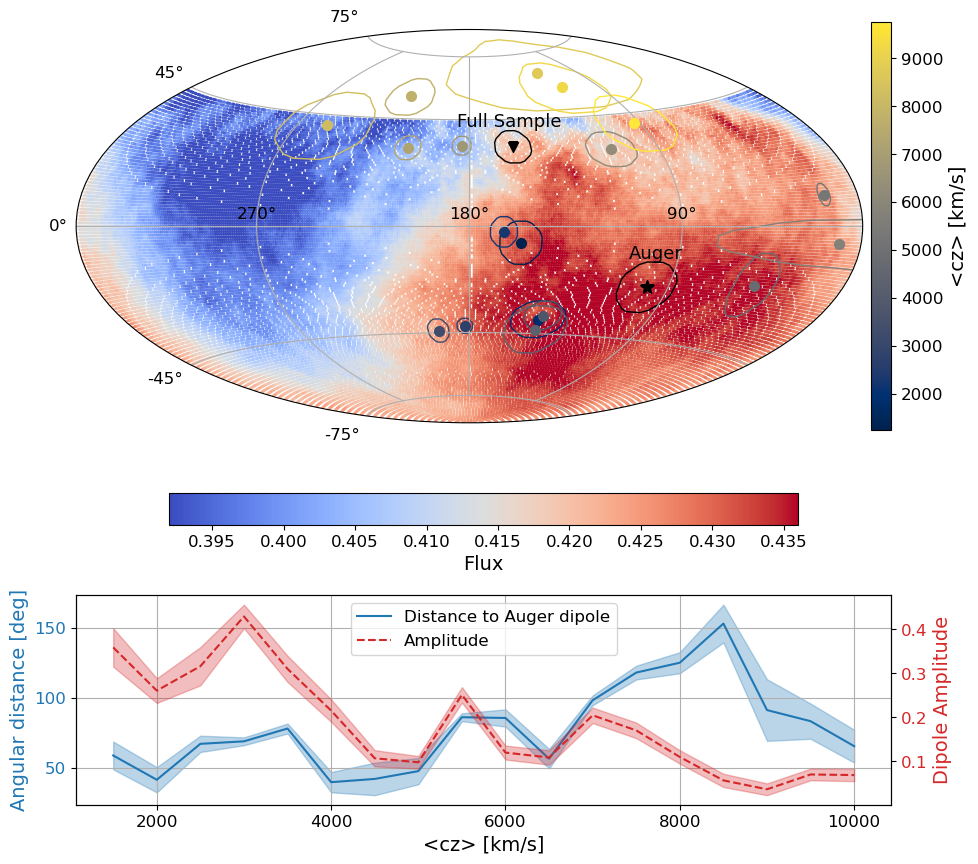

In [8]:
import numpy as np
from astropy.io import ascii
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u
from scipy.special import erfinv
import matplotlib.cm as cm
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Om0=0.3)
from astropy.table import Table
from matplotlib.patches import Ellipse
import matplotlib.colors as colors
from matplotlib.cm import ScalarMappable

def read_catalog(path='../data/', 
                 name='2mrs_1175_done.dat', ncols=29):
  
  with open(path+name, 'r') as file:
    archivo = file.readlines()
    header  = [a.replace('#','').split() for a in archivo[:10]]
    lines   = archivo[10:]
  
  columns = header[-1]
  assert(len(columns) == ncols)
  print("Read %s\nColumns:" % name)
  print(columns)
  
  g = [[] for _ in range(ncols)]     
  for line in lines:
    values = line.split()
    g[0].append(            values[0]);   g[1].append(np.float32(values[1]));   g[2].append(np.float32(values[2]));
    g[3].append(np.float32( values[3]));  g[4].append(np.float32(values[4]));   g[5].append(np.float32(values[5]));
    g[6].append(np.float32( values[6]));  g[7].append(np.float32(values[7]));   g[8].append(np.float32(values[8]));
    g[9].append(np.float32( values[9]));  g[10].append(np.float32(values[10])); g[11].append(np.float32(values[11]));
    g[12].append(np.float32(values[12])); g[13].append(np.float32(values[13])); g[14].append(np.float32(values[14]));
    g[15].append(np.float32(values[15])); g[16].append(np.float32(values[16])); g[17].append(np.float32(values[17]));
    g[18].append(np.float32(values[18])); g[19].append(np.float32(values[19])); g[20].append(np.float32(values[20]));
    g[21].append(           values[21]) ; g[22].append(           values[22]);  g[23].append(values[23]); g[24].append(np.int32(values[24]));
    g[25].append(np.int32(  values[25])); g[26].append(           values[26]);  g[27].append(values[27]); g[28].append(         values[28])
  
  data = Table()
  for idx, col in enumerate(columns):
    data[col] = np.array(g[idx])

  data = data[data['v'] > 1200]  # Filter out galaxies with negative cz values

  # Create ks column for K-band absolute magnitude
  from astropy.constants import c
  cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Om0=0.3)
  comoving_dist = cosmo.comoving_distance((data['v']*u.km/u.s)/c) 
  data['ks']  = data['k_tc'] - 25 - 5*np.log10(comoving_dist.value*(1 + (data['v']*u.km/u.s)/c))  # K-band absolute magnitude

  data['_RAJ2000'] = data['RAdeg']  
  data['_DEJ2000'] = data['DECdeg']  
  data['cz'] = data['v']

  return data

# === Load galaxy catalogue ===
gxs = read_catalog()
RA_all = np.deg2rad(gxs['_RAJ2000'])
Dec_all = np.deg2rad(gxs['_DEJ2000'])
cz_all = gxs['cz']
#weights_all = np.ones(len(RA_all))
weights_all = 10**(-.4 * gxs['ks']) # Use K-band Luminosity as weights

# === Load flux cataloge ===
# Load flux data
file_path = "../data/Auger/flux_a8_lb.dat"
flux_cat = np.loadtxt(file_path)

# Columns: Dec, RA, Flux, Flux_unc, Gal_l, Gal_b
flux_dec = flux_cat[:, 0]
flux_ra = flux_cat[:, 1]
flux_val = flux_cat[:, 2]

# Convert to radians
ra_rad = np.radians(flux_ra)
dec_rad = np.radians(flux_dec)

# Shift RA to put RA=0° on right edge, increase leftward
ra_shifted = np.remainder(ra_rad + np.pi, 2 * np.pi)
ra_shifted[ra_shifted > np.pi] -= 2 * np.pi
ra_shifted = -ra_shifted  # flip to increase leftward


# === Define cz bins ===
# cz_bins = [
#     (1200, 9000),       # Full sample
#     (1200, 3600),
#     (4000, 5000),
#     (9000, 9400)
# ]
cz_bins = [(cz, cz + 500) for cz in range(1000, 10000, 500)]
cz_bins.insert(0, (900, 9000))  # Add full sample as first bin

# === Setup colors and storage ===
n_bins = len(cz_bins)
dipole_results = {}
# Normalize cz range for colormap
cz_vals = [0.5 * (cz_min + cz_max) for (cz_min, cz_max) in cz_bins]
cz_norm = mcolors.Normalize(vmin=min(cz_vals[1:]), vmax=max(cz_vals[1:]))  # exclude full sample from colormap range
cmap = cm.cividis  # or try 'viridis', 'turbo', 'cividis'
#import seaborn as sns
#cmap = sns.dark_palette("#69d", reverse=True, as_cmap=True)

# === Auger reference dipole ===
auger_RA = 100.0
auger_Dec = -24.0
auger_coord = SkyCoord(ra=auger_RA * u.deg, dec=auger_Dec * u.deg, frame='icrs')
auger_error_deg = 10.0  # Typical uncertainty in Auger dipole direction
auger_error_ra_deg = 10.0  # Uncertainty in RA
auger_error_dec_deg = 13.0  # Uncertainty in Dec

# === Loop through bins ===
for i, (cz_min, cz_max) in enumerate(cz_bins):
    label = "Full Sample" if i == 0 else f"{cz_min}-{cz_max} km/s"
    cz_mid = 0.5 * (cz_min + cz_max)
    color = 'k' if i == 0 else cmap(cz_norm(cz_mid))  # gray for full sample, colormap for bins

    # Filter galaxies
    mask = (cz_all > cz_min) & (cz_all < cz_max)
    RA = RA_all[mask]
    Dec = Dec_all[mask]
    weights = weights_all[mask]

    if len(RA) < 10:
        print(f"Skipping {label} — too few galaxies ({len(RA)})")
        continue

    W = np.sum(weights)

    # === 2D Rayleigh dipole ===
    a_alpha = (2.0 / W) * np.sum(weights * np.cos(RA))
    b_alpha = (2.0 / W) * np.sum(weights * np.sin(RA))
    r_alpha = np.sqrt(a_alpha**2 + b_alpha**2)
    phi_alpha_deg = np.rad2deg(np.arctan2(b_alpha, a_alpha) % (2 * np.pi))

    # === 3D dipole direction ===
    x = np.cos(Dec) * np.cos(RA)
    y = np.cos(Dec) * np.sin(RA)
    z = np.sin(Dec)
    X = np.sum(weights * x)
    Y = np.sum(weights * y)
    Z = np.sum(weights * z)
    norm = np.sqrt(X**2 + Y**2 + Z**2)
    X /= norm
    Y /= norm
    Z /= norm

    dipole_amp = norm / W
    alpha_d = (np.arctan2(Y, X) % (2 * np.pi)) * 180 / np.pi
    delta_d = np.arcsin(Z) * 180 / np.pi

    # === Uncertainty and significance ===
    Weff = W**2 / np.sum(weights**2)                # Effective weight
    sigma_r = np.sqrt(2 / Weff)                     # Uncertainty in radial component
    sigma_phi_deg = np.rad2deg(sigma_r / r_alpha)   # Rough approximation
    sigma_dec_deg = sigma_phi_deg                   # rough approximation
    P_rayleigh = np.exp(-Weff * r_alpha**2 / 4)     # Rayleigh p-value
    Zsig = np.sqrt(2) * erfinv(1 - 2 * P_rayleigh)  # Gaussian significance

    # === Angular separation from Auger dipole ===
    dip_coord = SkyCoord(ra=alpha_d * u.deg, dec=delta_d * u.deg, frame='icrs')
    separation = dip_coord.separation(auger_coord).deg

    # === Store results ===
    dipole_results[label] = {
        'RA': alpha_d,
        'Dec': delta_d,
        'r_alpha': r_alpha,
        'd_perp': dipole_amp,
        'sigma_r': sigma_r,
        'sigma_phi': sigma_phi_deg,
        'sigma_dec': sigma_dec_deg,
        'Z': Zsig,
        'P': P_rayleigh,
        'separation': separation,
        'N': len(RA),
        'color': color
    }

    # === Bootstrap dipole errors ===
    n_bootstrap = 500
    dipole_ras = []
    dipole_decs = []
    dipole_amps_bs = []
    sep_bs = []

    for _ in range(n_bootstrap):
        indices = np.random.choice(len(RA), size=len(RA), replace=True)
        RA_bs = RA[indices]
        Dec_bs = Dec[indices]
        weights_bs = weights[indices]

        x = np.cos(Dec_bs) * np.cos(RA_bs)
        y = np.cos(Dec_bs) * np.sin(RA_bs)
        z = np.sin(Dec_bs)

        X = np.sum(weights_bs * x)
        Y = np.sum(weights_bs * y)
        Z = np.sum(weights_bs * z)
        norm = np.sqrt(X**2 + Y**2 + Z**2)
        X /= norm
        Y /= norm
        Z /= norm

        amp = norm / np.sum(weights_bs)
        ra_bs = (np.arctan2(Y, X) % (2 * np.pi)) * 180 / np.pi
        dec_bs = np.arcsin(Z) * 180 / np.pi

        dipole_ras.append(ra_bs)
        dipole_decs.append(dec_bs)
        dipole_amps_bs.append(amp)

        # Angular separation with Auger dipole
        dip_coord_bs = SkyCoord(ra=ra_bs * u.deg, dec=dec_bs * u.deg, frame='icrs')
        sep = dip_coord_bs.separation(auger_coord).deg
        sep_bs.append(sep)

    # === Bootstrap uncertainties ===
    sigma_ra_boot = np.std(dipole_ras)
    sigma_dec_boot = np.std(dipole_decs)
    sigma_amp_boot = np.std(dipole_amps_bs)
    sigma_sep_boot = np.std(sep_bs)

    dipole_results[label].update({
        'sigma_ra_boot': sigma_ra_boot,
        'sigma_dec_boot': sigma_dec_boot,
        'sigma_amp_boot': sigma_amp_boot,
        'sigma_sep_boot': sigma_sep_boot
    })

    # === Print result ===
    print(f"\n=== Dipole for {label} ===")
    print(f"N = {len(RA)} galaxies")
    print(f"RA = {alpha_d:.2f}° ± {sigma_phi_deg:.2f}° (± {sigma_ra_boot:.2f}° bootstrapped)")
    print(f"Dec = {delta_d:.2f}° ± {sigma_dec_deg:.2f}° (± {sigma_dec_boot:.2f}° bootstrapped)")
    print(f"Amplitude = {dipole_amp:.4f} ± {sigma_amp_boot:.4f}")
    print(f"Significance = {Zsig:.2f} sigma (p = {P_rayleigh:.2e})")
    print(f"Angular separation from Auger = {separation:.2f}° ± {sigma_sep_boot:.2f}°")


# === Set up top and bottom subplots ===
fig = plt.figure(figsize=(10, 10))
gs = fig.add_gridspec(nrows=2, ncols=1, height_ratios=[3, 1])
ax_top = fig.add_subplot(gs[0], projection='hammer')
ax_bottom = fig.add_subplot(gs[1])
ax_top.grid(True)

# === Set fontsizrs ===

plt.rcParams.update({
    'font.size': 14,          # default text size
    'axes.labelsize': 14,     # x/y labels
    'axes.titlesize': 18,     # plot titles
    'xtick.labelsize': 12,    # x tick labels
    'ytick.labelsize': 12,    # y tick labels
    'legend.fontsize': 12     # legend text
})

# === Configure Hammer (Top) Axis ===
xticks_deg = [270, 180, 90]
xticks_rad = -np.radians(xticks_deg) + np.pi
ax_top.set_xticks(xticks_rad)
ax_top.set_xticklabels([f"{d}°" for d in xticks_deg])

yticks_deg = [-75, -45, 0, 45, 75]
yticks_rad = np.radians(yticks_deg)
ax_top.set_yticks(yticks_rad)
ax_top.set_yticklabels([f"{d}°" for d in yticks_deg])

# === Plot flux on sky ===
norm_flux = colors.Normalize(vmin=np.percentile(flux_val, 5), vmax=np.percentile(flux_val, 95))
# === Remove NaNs from flux_val and corresponding positions ===
mask = np.isfinite(flux_val)
ra_shifted = ra_shifted[mask]
dec_rad = np.radians(flux_dec[mask])
flux_val = flux_val[mask]
sc = ax_top.scatter(ra_shifted, dec_rad, c=flux_val, s=5, cmap='coolwarm', norm=norm_flux, edgecolor='none')

# Horizontal colorbar for flux
cbar_flux = fig.colorbar(sc, ax=ax_top, orientation='horizontal', pad=-.1, fraction=0.05)
cbar_flux.set_label("Flux")

# === Plot dipoles ===
for label, res in dipole_results.items():
    ra_rad = np.deg2rad(res['RA'])
    dec_rad = np.deg2rad(res['Dec'])
    ra_plot = -ra_rad + np.pi  # <- RA increases right to left
    color = res['color']
    amp = res['d_perp']

    marker = 'o' if label != 'Full Sample' else 'v'
    ax_top.plot(ra_plot, dec_rad, marker, color=color, label=label, markersize=7)

    ellipse = Ellipse(
        (ra_plot, dec_rad),
        width=2*np.deg2rad(res['sigma_ra_boot']),
        height=2*np.deg2rad(res['sigma_dec_boot']),
        angle=0,
        edgecolor=color,
        facecolor='none',
        alpha=1,
        transform=ax_top.transData
    )
    ax_top.add_patch(ellipse)

    if label == 'Full Sample':
        ax_top.text(ra_plot, dec_rad + 0.15, label, ha='center', color='k', size=13)

# Auger point and ellipse
auger_ra_plot = -np.deg2rad(auger_RA) + np.pi
auger_dec_rad = np.deg2rad(auger_Dec)
ax_top.plot(auger_ra_plot, auger_dec_rad, 'k*', markersize=10, label='Auger Dipole')
ellipse = Ellipse(
    (auger_ra_plot, auger_dec_rad),
    width=2*np.deg2rad(auger_error_dec_deg),
    height=2*np.deg2rad(auger_error_ra_deg),
    angle=0,
    edgecolor='k',
    facecolor='none',
    alpha=1,
    transform=ax_top.transData
)
ax_top.add_patch(ellipse)
ax_top.text(auger_ra_plot, auger_dec_rad + 0.2, "Auger", ha='center', color='k', size=13)
#ax_top.set_title("Galaxy Dipole Directions with Error Circles (Equatorial)", pad=40)

# Vertical cz colorbar
sm = ScalarMappable(cmap=cmap, norm=cz_norm)
sm.set_array([])
cbar_cz = fig.colorbar(sm, ax=ax_top, orientation='vertical', pad=0.01, fraction=0.025)
cbar_cz.set_label("<cz> [km/s]")

# === Bottom Plot: Dipole amp & separation ===
cz_bin_centers = []
angular_separations = []
dipole_amps = []
ang_diam_dists = []

for label, res in dipole_results.items():
    if label == "Full Sample":
        continue

    cz_mid = float(label.split('-')[0]) + 500
    cz_bin_centers.append(cz_mid)
    angular_separations.append(res['separation'])
    dipole_amps.append(res['d_perp'])

    cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Om0=0.3)
    z = cz_mid / 3e5
    d_ang = cosmo.angular_diameter_distance(z).value
    ang_diam_dists.append(d_ang)

x = cz_bin_centers
sep_errors = [dipole_results[label]['sigma_sep_boot'] for label in dipole_results if label != "Full Sample"]
amp_errors = [dipole_results[label]['sigma_amp_boot'] for label in dipole_results if label != "Full Sample"]

# Angular separation on left y-axis
color1 = 'C0'
ax_bottom.fill_between(x, np.array(angular_separations)-np.array(sep_errors), np.array(angular_separations)+np.array(sep_errors), color=color1, alpha=0.3)
ln1 = ax_bottom.plot(x, angular_separations, ls='-', color=color1, label='Distance to Auger dipole')
ax_bottom.set_ylabel("Angular distance [deg]", color=color1)
ax_bottom.tick_params(axis='y', labelcolor=color1)
ax_bottom.grid(True)

# Dipole amplitude on right y-axis
ax2 = ax_bottom.twinx()
color2 = 'C3'
ax2.fill_between(x, np.array(dipole_amps)-np.array(amp_errors), np.array(dipole_amps)+np.array(amp_errors), color=color2, alpha=0.3)
ln2 = ax2.plot(x, dipole_amps, ls='--', color=color2, label='Amplitude')
ax2.set_ylabel("Dipole Amplitude", color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# X-axis
ax_bottom.set_xlabel("<cz> [km/s]")

# Legend
lines = ln1 + ln2  # flatten the list of lines
labels = [l.get_label() for l in lines]
ax_bottom.legend(lines, labels, loc='upper center')


#ax_bottom.set_title("Dipole Angular Separation and Amplitude vs cz")
plt.rcParams.update({
    'font.size': 14,          # default text size
    'axes.labelsize': 14,     # x/y labels
    #'axes.titlesize': 18,     # plot titles
    'xtick.labelsize': 12,    # x tick labels
    'ytick.labelsize': 12,    # y tick labels
    'legend.fontsize': 12     # legend text
})

plt.tight_layout()
plt.savefig('../plots/plot1_paper1.png', dpi=300)
plt.show()


